<a href="https://colab.research.google.com/github/Chachi36/Diabetes-Factors-Demo-Notebook/blob/main/Diabetes_Risk_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Risk Factor Analysis

This notebook explores a 5000-sample dataset.

*Disclaimer: Notebook is in third person voice as a convention, there is only one person (me - Charles Childress) working on this project.

## 1. Problem

In this notebook, our goal is to develop a model that can identify the major risk factors that contribute to the development of diabetes in an individual.  We will take necessary and unnecessary steps along the way as we feel the variables out.  This notebook is exploratory and open-ended for now.  

## 2. Data

The data we're using is from the Behavioral Risk Factor Surveillance System 2014 Codebook Report as provided by the U.S. Digital Corps' Data Science and Analytics pathway program.  It consists of three 5000-sample csv dataframes with 34 initial variables that we merge using a shared `'PERSONID'` variable.  

## 3. Evaluation

Standard Logistic Regression metrics including accuracy and recall.

## 4. Features

Some information about the data:
* We are working with a 5000-sample structured dataset presented in csv format.
* The response variable, `'DIABETE3'`, starts out multi-categorical.  
* There is a mixture of categorical, numerical, and ordinal data in this dataset.  

### Functions and tools that we use throughout this notebook (run this every time)

Tools (non-exhaustive):

In [1]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Let's create a quick counting function that will help us save time with future code.  We will call our function `'give_counts()'`.

In [2]:
# Getting counts for individual variables
def give_counts(df, var):
  """This function will take a DataFrame and a variable and give the counts of each of the entries for the specified variable."""

  count_a = 0
  print(f"Counts for '{var}' are as follows:")
  for i in set(df[var]):
    if i >= 0.0:
      num = len(df[df[var] == i])
      print(f"The number of people who answered {i} for '{var}' is {num}.")
    else:
      count_a += 1
      continue
  print(f"The number of people who did not answer for '{var}' is {count_a}.")
  print(f"The total number of entries is {len(df[var])}.")
  return

Let's create a function for viewing our dependent variable vs a user chosen variable.

In [3]:
# Plotting individual variables
def plotter_ind(df, a):
  """This function will take a DataFrame and a variable and compare said variable to our dependent variable, 'DIABETE_SIMP'."""

  sns.catplot(x=a, y="DIABETE_SIMP", data=df, hue=a, palette="rainbow", kind="bar", legend=False)
  plt.title(f"Diabetes Rate by '{a}'")
  plt.xlabel(f"{a}")
  plt.ylabel("Diabetes Rate")
  plt.show()
  return

Let's create a function for viewing all our columns vs a specified variable.

In [4]:
# Big Plotter
def plotter_big(df, comp):
  """This function will take a DataFrame and a column and return a set of plots comparing the specified column against all other columns in the DataFrame."""

  rows = (len(df.columns) // 5) + 1

  ### PLOT BUILD
  fig, ax = plt.subplots(rows, 5, figsize=(10,10), sharey=True)
  sns.set(style="whitegrid", color_codes=True)
  # sns.set_color_codes("bright")

  for i,col in enumerate(df.columns[:]):
    if i <= 4:
      sns.barplot(x=df[col], y=df[comp], hue=df[col], palette="rainbow", legend=False, ax=ax[0,i])
    elif i > 4 and i <=9:
      sns.barplot(x=df[col], y=df[comp], hue=df[col], palette="rainbow", legend=False, ax=ax[1,i-5])
    elif i > 9 and i <=14:
      sns.barplot(x=df[col], y=df[comp], hue=df[col], palette="rainbow", legend=False, ax=ax[2,i-10])
    elif i > 14 and i <=19:
      sns.barplot(x=df[col], y=df[comp], hue=df[col], palette="rainbow", legend=False, ax=ax[3,i-15])
    elif i > 19 and i <=24:
      sns.barplot(x=df[col], y=df[comp], hue=df[col], palette="rainbow", legend=False, ax=ax[4,i-20])
    elif i > 24 and i <=29:
      sns.barplot(x=df[col], y=df[comp], hue=df[col], palette="rainbow", legend=False, ax=ax[5,i-25])
    else:
      sns.barplot(x=df[col], y=df[comp], hue=df[col], palette="rainbow", legend=False, ax=ax[6,i-30])

  fig.suptitle('My Bar Plots')
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)

  plt.show()
  plt.clf()
  plt.close()

  return

Let's create a function for trimming rows with specific entries.

In [5]:
############################### Continue working on this function next time (debug with MARITAL) #####################################

# Row Dropper
def row_drop(df, variable="", lb=0.0, ub=100.0, ind=None):
  """This function takes the dataframe, the variable, the lower bound, the upper bound, and any values in between.  This function then trims rows off the dataframe that are not within specified bounds and any other specified values."""

  # before dropping
  print(f"Count before dropping any rows from the length of '{variable}': {len(df)}")

  # drop rows with values below the 'low_bound' value
  df = df[(df[variable] >= lb)]

  # drop rows with values above the 'up_bound' value
  df = df[(df[variable] <= ub)]

  # drop rows with 'ind' value
  df = df[~(df[variable] == ind)]

  # reset index
  df.reset_index(inplace=True, drop=True)

  print("...\n"*3)

  # After dropping
  print(f"Count after dropping rows from '{variable}': {len(df)}")

  return df

### Importing our data

In [ ]:
# Read the CSV files to individual DataFrames
df_num = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_numeric.csv")
df_cat = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_categorical.csv")
df_ord = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_ordinal.csv")

print("\ndf_num has columns:")
print(df_num.columns)

print("\ndf_cat has columns:")
print(df_cat.columns)

print("\ndf_ord has columns:")
print(df_ord.columns)


df_num has columns:
Index(['PERSONID', 'DIABETE3', 'NUMADULT', 'CHILDREN', 'WEIGHT2', 'DRVISITS'], dtype='object')

df_cat has columns:
Index(['PERSONID', 'DIABETE3', '_RACE', 'MSCODE', 'FLUSHOT6', 'EMPLOY1', 'SEX',
       'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY', 'USEEQUIP', '_TOTINDA',
       'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE', 'HLTHPLN1',
       'DIABETE3.1', '_STATE', 'ASTHMA3', 'MARITAL.1'],
      dtype='object')

df_ord has columns:
Index(['PERSONID', 'DIABETE3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT', 'CHECKUP1',
       'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3'],
      dtype='object')


Since `"DIABETE3"` appears exactly the same on all 3 DataFrames, we are going to drop it from the `df_cat` and `df_ord` DataFrames before merging.  

Also of note is that `"DIABETE3"` and `"MARITAL"` appear twice in `df_cat`, so we will also drop the `"DIABETE3.1"` and `"MARITAL.1"` variables.

In [ ]:
# dropping columns
df_cat = df_cat.drop("DIABETE3", axis=1)
df_cat = df_cat.drop("DIABETE3.1", axis=1)
df_cat = df_cat.drop("MARITAL.1", axis=1)
df_ord = df_ord.drop("DIABETE3", axis=1)

In [ ]:
# Merge the DataFrames on PERSONID
merged_df1 = df_num.merge(df_cat, on="PERSONID")
merged_df2 = merged_df1.merge(df_ord, on="PERSONID")

# Check the columns of our merged DataFrame.
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
 6   _RACE     4997 non-null   float64
 7   MSCODE    3187 non-null   float64
 8   FLUSHOT6  4762 non-null   float64
 9   EMPLOY1   4981 non-null   float64
 10  SEX       5000 non-null   float64
 11  MARITAL   4990 non-null   float64
 12  CVDCRHD4  5000 non-null   float64
 13  HLTHCVR1  3318 non-null   float64
 14  CHCKIDNY  5000 non-null   float64
 15  USEEQUIP  4837 non-null   float64
 16  _TOTINDA  5000 non-null   float64
 17  ADDEPEV2  5000 non-null   float64
 18  RENTHOM1  4898 non-null   float64
 19  EXERANY2  5000 non-null   float64
 20  BLIND     4830 non-null   floa

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
merged_df2.to_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv", index=False)

### Peeking at some of the variables

In [ ]:
# Make a temporary DataFrame to manipulate
tmp_df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv")

Though `'PERSONID'` was a useful variable for stitching together the three csv files, we no longer need it because we are trying to identify the major factors contributing to deveping diabetes and `'PERSONID'` has zero impact on health.  

In [ ]:
# dropping
tmp_df.drop("PERSONID", axis=1, inplace=True)

#### **The Question:** `'DIABETE3'`

**Categorical variable**

"(Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If respondent says pre-diabetes or borderline diabetes, use response code 4.)"

**Current DIABETE3 classifications:**

- 1.0 - Yes
- 2.0 - Yes, but female told only during pregnancy
- 3.0 - No
- 4.0 - No, pre-diabetes or borderline diabetes
- 7.0 - Don't know/Not Sure
- 9.0 - Refused

**Proposed DIABETE3 classifications (without 7 counfounding data points):**

- 1.0 - Yes
- 2.0 - Yes, but female told only during pregnancy
- 3.0 - No
- 4.0 - No, pre-diabetes or borderline diabetes

With all that in mind, let's drop these 7 data points then make a quick correlation matrix.

In [ ]:
# DIABETE3 counts
give_counts(tmp_df, "DIABETE3")

Counts for 'DIABETE3' are as follows:
The number of people who answered 1.0 for 'DIABETE3' is 627.
The number of people who answered 2.0 for 'DIABETE3' is 39.
The number of people who answered 3.0 for 'DIABETE3' is 4251.
The number of people who answered 4.0 for 'DIABETE3' is 76.
The number of people who answered 7.0 for 'DIABETE3' is 2.
The number of people who answered 9.0 for 'DIABETE3' is 5.
The number of people who did not answer for 'DIABETE3' is 0.
The total number of entries is 5000.


In the results of the above code there are only 2 entries for `'7.0'` and 5 entries for `'9.0'`.  This by itself might be reason to discard these data points, as it is difficult to build a model with so few entries.  We argue that the data points should also be discarded on account of what they represent; "Don't know/Not Sure" and "Refused [to answer]".  We are attempting to create a model that can "identify risk factors for diabetes", so data points that don't give feedback about diabetes are useless to us.  

In [ ]:
# dropping rows containing 7.0 and 9.0
tmp_df = row_drop(df=tmp_df, variable="DIABETE3", lb=1.0, ub=4.0)

Count before dropping any rows from the length of 'DIABETE3': 5000
...
...
...

Count after dropping rows from 'DIABETE3': 4993


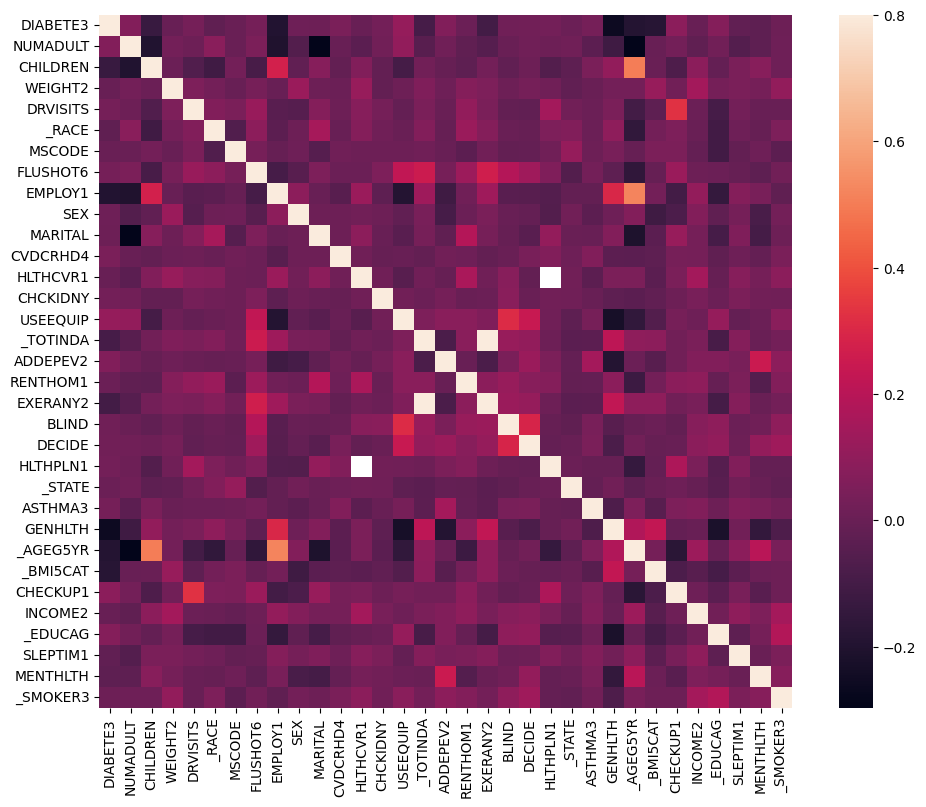

In [ ]:
#correlation matrix
corrmat = tmp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# correlation values
tmp_df.corr()['DIABETE3'].sort_values()

GENHLTH    -0.262288
EMPLOY1    -0.195581
_AGEG5YR   -0.192449
_BMI5CAT   -0.184727
CHILDREN   -0.130667
EXERANY2   -0.100523
_TOTINDA   -0.094097
MENTHLTH   -0.029373
_RACE      -0.023065
SLEPTIM1   -0.022054
WEIGHT2    -0.002622
HLTHCVR1   -0.002589
INCOME2    -0.001692
MSCODE     -0.000652
RENTHOM1    0.004468
_STATE      0.006365
_SMOKER3    0.010017
MARITAL     0.010931
SEX         0.012880
BLIND       0.017328
DECIDE      0.023833
HLTHPLN1    0.025467
CHCKIDNY    0.027210
DRVISITS    0.032040
ASTHMA3     0.032461
FLUSHOT6    0.032521
CVDCRHD4    0.041618
ADDEPEV2    0.062212
NUMADULT    0.064014
_EDUCAG     0.069299
CHECKUP1    0.087236
USEEQUIP    0.113116
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

In [ ]:
tmp_df.corr()['DIABETE3'].abs().sort_values().tail(6)

CHILDREN    0.130667
_BMI5CAT    0.184727
_AGEG5YR    0.192449
EMPLOY1     0.195581
GENHLTH     0.262288
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

What we've done above is we've made a heatmap of correlations and then picked out those top few that correlate (or anti-correlate) most highly with `'DIABETE3'`.  There is clearly lots of correlation between many of the variables as well that we should remember to account for later.  

#### **Correlation Thought Experiment**

The more correlation exists between the variables in our model, the more variance will be present.  Let's see if trimming some correlated variables can help our heatmap become more readable.  

In [ ]:
# some additional tools
import statistics as stat
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

For the type of analysis we are about to run, a `VIF` score from:

- 0 to 1 - indicates low correlation with other variables
- 1 to 5 - indicates a moderate correlation with other variables
- over 5 - indicates a large correlation with other variables

In [ ]:
#find design matrix for regression model using 'Survived' as response variable
y, X = dmatrices('DIABETE3 ~ NUMADULT+CHILDREN+WEIGHT2+DRVISITS+_RACE+MSCODE+FLUSHOT6+EMPLOY1+SEX+MARITAL+CVDCRHD4+HLTHCVR1+CHCKIDNY+USEEQUIP+_TOTINDA+ADDEPEV2+RENTHOM1+EXERANY2+BLIND+DECIDE+HLTHPLN1+_STATE+ASTHMA3+GENHLTH+_AGEG5YR+_BMI5CAT+CHECKUP1+INCOME2+_EDUCAG+SLEPTIM1+MENTHLTH+_SMOKER3', data=tmp_df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df.to_string())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


     variable        VIF
0   Intercept   0.000000
1    NUMADULT   1.279734
2    CHILDREN   1.581101
3     WEIGHT2   1.044668
4    DRVISITS   1.118614
5       _RACE   1.069824
6      MSCODE   1.049888
7    FLUSHOT6   1.082400
8     EMPLOY1   1.664452
9         SEX   1.078101
10    MARITAL   1.253867
11   CVDCRHD4   1.012168
12   HLTHCVR1   1.044873
13   CHCKIDNY   1.014935
14   USEEQUIP   1.247354
15   _TOTINDA  83.165754
16   ADDEPEV2   1.153168
17   RENTHOM1   1.072753
18   EXERANY2  83.698476
19      BLIND   1.059302
20     DECIDE   1.089915
21   HLTHPLN1   0.000000
22     _STATE   1.023191
23    ASTHMA3   1.045196
24    GENHLTH   1.482458
25   _AGEG5YR   2.356012
26   _BMI5CAT   1.142287
27   CHECKUP1   1.134571
28    INCOME2   1.061954
29    _EDUCAG   1.186324
30   SLEPTIM1   1.044270
31   MENTHLTH   1.169750
32   _SMOKER3   1.102611


The high correlation results we are seeing here with `'_TOTINDA'` and `'EXERANY2'` makes complete sense.  

**As stated in the provided data bible:**
- `'_TOTINDA'` - "Adults who reported doing physical activity or exercise during the past 30 days other than their regular job"
- `'EXERANY2'` - "During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?"

Since `'EXERANY2'` has a more significant effect at `-0.100523` (versus `'_TOTINDA'` at `-0.094097`), we are going to drop the `'_TOTINDA'` variable and run the `VIF` again.

In [ ]:
#find design matrix for regression model using 'Survived' as response variable
y, X = dmatrices('DIABETE3 ~ NUMADULT+CHILDREN+WEIGHT2+DRVISITS+_RACE+MSCODE+FLUSHOT6+EMPLOY1+SEX+MARITAL+CVDCRHD4+HLTHCVR1+CHCKIDNY+USEEQUIP+ADDEPEV2+RENTHOM1+EXERANY2+BLIND+DECIDE+HLTHPLN1+_STATE+ASTHMA3+GENHLTH+_AGEG5YR+_BMI5CAT+CHECKUP1+INCOME2+_EDUCAG+SLEPTIM1+MENTHLTH+_SMOKER3', data=tmp_df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df.to_string())

     variable       VIF
0   Intercept  0.000000
1    NUMADULT  1.279430
2    CHILDREN  1.580749
3     WEIGHT2  1.044667
4    DRVISITS  1.110729
5       _RACE  1.069728
6      MSCODE  1.047773
7    FLUSHOT6  1.081271
8     EMPLOY1  1.663848
9         SEX  1.077975
10    MARITAL  1.251949
11   CVDCRHD4  1.011994
12   HLTHCVR1  1.044608
13   CHCKIDNY  1.014860
14   USEEQUIP  1.247265
15   ADDEPEV2  1.151312
16   RENTHOM1  1.072570
17   EXERANY2  1.147209
18      BLIND  1.058977
19     DECIDE  1.089607
20   HLTHPLN1  0.000000
21     _STATE  1.022780
22    ASTHMA3  1.043889
23    GENHLTH  1.480194
24   _AGEG5YR  2.356011
25   _BMI5CAT  1.139861
26   CHECKUP1  1.133619
27    INCOME2  1.059613
28    _EDUCAG  1.185114
29   SLEPTIM1  1.043470
30   MENTHLTH  1.169697
31   _SMOKER3  1.090207


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Since there is only moderate correlation left, this is as much pruning as we will do right now.  Let's take a quick look at the correlation matrix and our top most interesting variables.

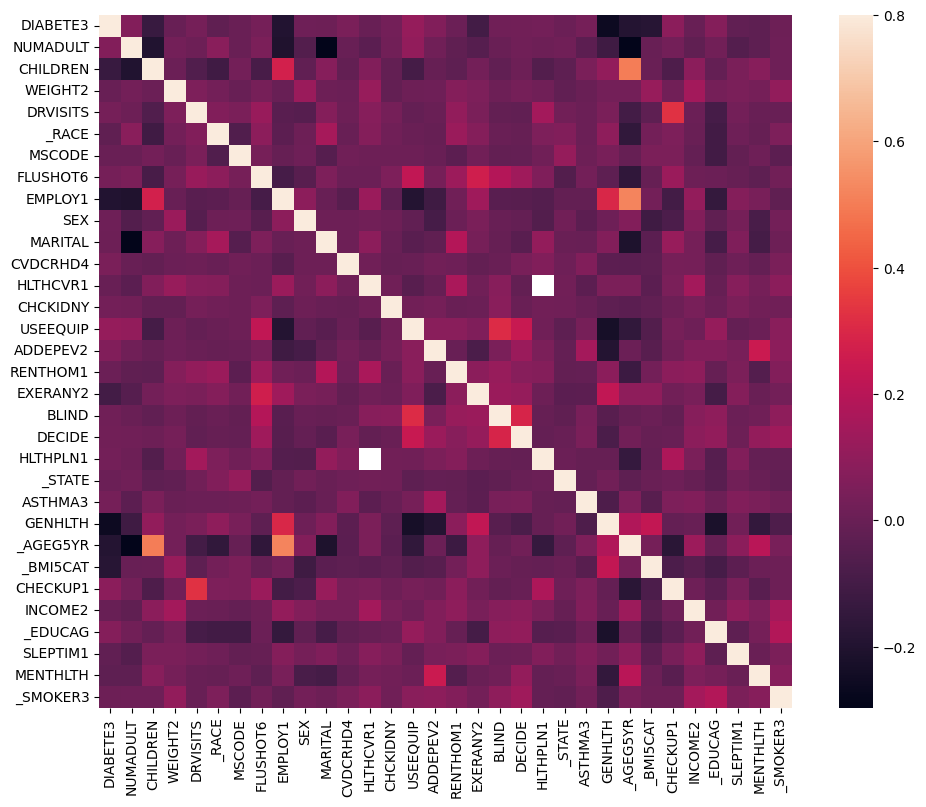

In [ ]:
# drop _TOTINDA
tmp_df.drop("_TOTINDA", axis=1, inplace=True)

#correlation matrix
corrmat = tmp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# top values to peek at according to correlation with DIABETE3
tmp_df.corr()['DIABETE3'].abs().sort_values().tail(6)

CHILDREN    0.130667
_BMI5CAT    0.184727
_AGEG5YR    0.192449
EMPLOY1     0.195581
GENHLTH     0.262288
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

#### **Basic Data Visualization**

In a series of plots below, we are going to compare the response variable `'DIABETE3'` to the five of the independent variables that it was most highly correlated with (`'CHILDREN'`, `'_BMI5CAT'`, `'_AGEG5YR'`, `'EMPLOY1'`, and `'GENHLTH'`) in the previous section's findings.  

**Variable Details:**
- `'CHILDREN'` - "How many children less than 18 years of age live in your household?"
- `'_BMI5CAT'` - "Four-categories of Body Mass Index (BMI)"
- `'_AGEG5YR'` - "Fourteen-level age category"
- `'EMPLOY1'` - "Are you currently…?" [Question about employment]
- `'GENHLTH'` - "Would you say that in general your health is:" [Question about general health]

A simplified binomial look at the `'DIABETE3'` variable will help us visualize the above singled out variables.  Since there are far more entries for `'1.0'` and `'3.0'` (diabetes and no diabetes) than for `'2.0'` and `'4.0'` (pregnancy and pre-diabetes), let's drop responses `'2.0'` and `'4.0'`  from the temporary DataFrame we are working with and create a new variable `'DIABETE_SIMP'` that assigns `'0.0'` for `'3.0'` (patient does not have diabetes) and keeps `'1.0'` for `'1.0'` (patient has diabetes).  This gives a simple yes or no binary response that more readily exposes potential differences between those with diabetes and those without.

In [ ]:
# creating DIABETE_SIMP
li1 = tmp_df["DIABETE3"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 3.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

tmp_df["DIABETE_SIMP"] = li2

In [ ]:
# dropping rows containing 2.0 and 4.0
tmp_df = row_drop(df=tmp_df, variable="DIABETE_SIMP", lb=0.0, ub=1.0)

Count before dropping any rows from the length of 'DIABETE_SIMP': 4993
...
...
...

Count after dropping rows from 'DIABETE_SIMP': 4878


Let's drop the `'DIABETE3'` variable and move `'DIABETE_SIMP'` to the front of the DataFrame.

In [ ]:
tmp_df.columns

Index(['DIABETE3', 'NUMADULT', 'CHILDREN', 'WEIGHT2', 'DRVISITS', '_RACE',
       'MSCODE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4',
       'HLTHCVR1', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       'MENTHLTH', '_SMOKER3', 'DIABETE_SIMP'],
      dtype='object')

In [ ]:
tmp_df.drop("DIABETE3", axis=1, inplace=True)

In [ ]:
li1 = ['DIABETE_SIMP', 'NUMADULT', 'CHILDREN', 'WEIGHT2', 'DRVISITS', '_RACE',
       'MSCODE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4',
       'HLTHCVR1', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       'MENTHLTH', '_SMOKER3']

tmp_df = tmp_df[li1]

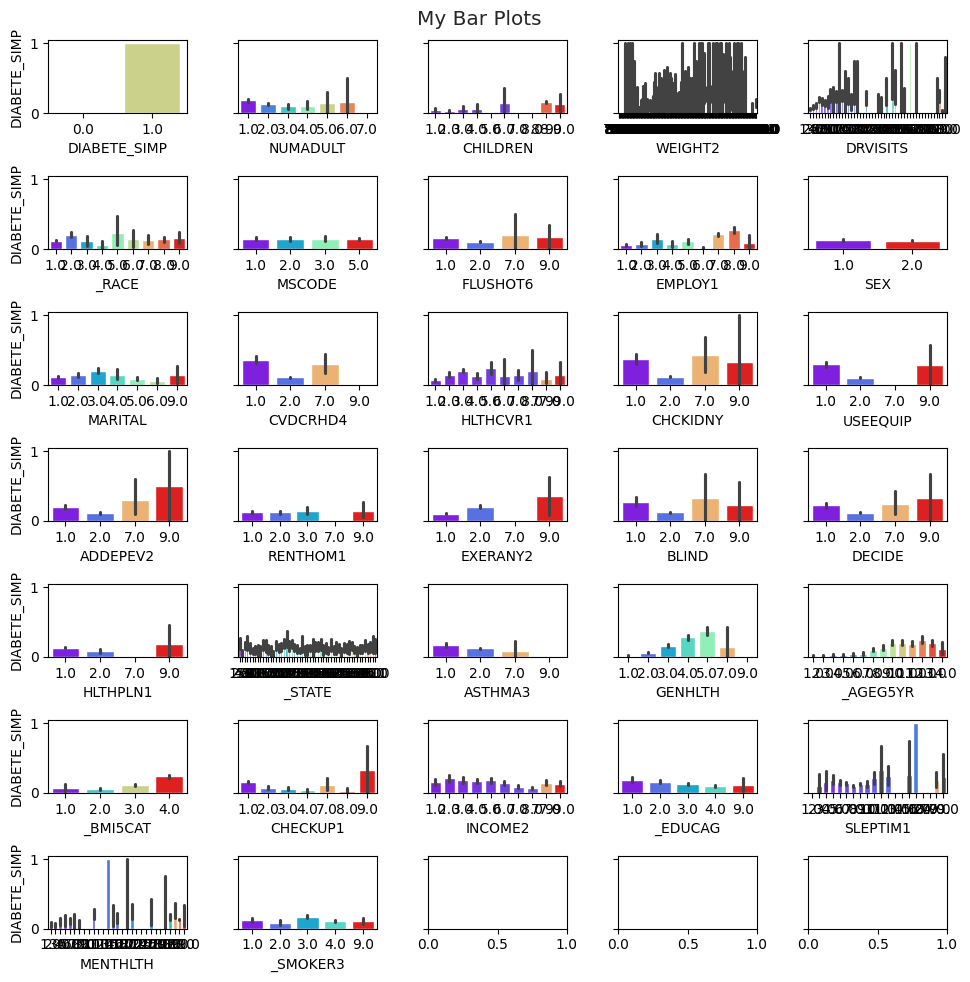

In [ ]:
# plotting all of them
plotter_big(tmp_df, "DIABETE_SIMP")

Wow!  Obviously we have some pretty useless plots amongst these that are worth taking a deeper look at on the basis of weird shape alone.  We'll come back around and run the above code again in the following sections to see how we have done in rescaling or dropping data.  

Before looking at our most impactful variables, we need to address the completely useless `'WEIGHT2'` variable.

#### **Variable:** `'WEIGHT2'`

**Numeric variable**

"About how much do you weigh without shoes? (If respondent answers in metrics put a 9 in the first column)[Round fractions up.]"

**Possible Responses:**
- 50 - 0999 - Weight (pounds)

- 7777 - Don't know/Not sure

- 9000 - 9998 - Weight (kilograms)
Notes: The initial '9' indicates this was a metric value.

- 9999 - Refused

In [ ]:
# WEIGHT2 counts
give_counts(tmp_df, "WEIGHT2")

Counts for 'WEIGHT2' are as follows:
The number of people who answered 580.0 for 'WEIGHT2' is 1.
The number of people who answered 75.0 for 'WEIGHT2' is 1.
The number of people who answered 84.0 for 'WEIGHT2' is 1.
The number of people who answered 86.0 for 'WEIGHT2' is 1.
The number of people who answered 87.0 for 'WEIGHT2' is 1.
The number of people who answered 89.0 for 'WEIGHT2' is 1.
The number of people who answered 90.0 for 'WEIGHT2' is 2.
The number of people who answered 92.0 for 'WEIGHT2' is 2.
The number of people who answered 93.0 for 'WEIGHT2' is 3.
The number of people who answered 94.0 for 'WEIGHT2' is 1.
The number of people who answered 95.0 for 'WEIGHT2' is 1.
The number of people who answered 96.0 for 'WEIGHT2' is 3.
The number of people who answered 7777.0 for 'WEIGHT2' is 61.
The number of people who answered 98.0 for 'WEIGHT2' is 1.
The number of people who answered 99.0 for 'WEIGHT2' is 4.
The number of people who answered 100.0 for 'WEIGHT2' is 21.
The number of

The `'WEIGHT2'` variable is a mess, with some weights being in kilos, some in pounds, and a strong tendency to fall on a multiple of five.  We are going to turn it all into pounds, then put it into bins of size 10 until 300lbs, size 20 until 400, then size 50 until 500.  The rescaled variable will be laid out as so.  

**Possible Responses:**
- 1 - 70 <= Weight (lbs) < 80
- 2 - 80 <= Weight (lbs) < 90
- 3 - 90 <= Weight (lbs) < 100
- 4 - 100 <= Weight (lbs) < 110
- 5 - 110 <= Weight (lbs) < 120
- 6 - 120 <= Weight (lbs) < 130
- 7 - 130 <= Weight (lbs) < 140
- 8 - 140 <= Weight (lbs) < 150
- 9 - 150 <= Weight (lbs) < 160
- 10 - 160 <= Weight (lbs) < 170
- 11 - 170 <= Weight (lbs) < 180
- 12 - 180 <= Weight (lbs) < 190
- 13 - 190 <= Weight (lbs) < 200
- 14 - 200 <= Weight (lbs) < 210
- 15 - 210 <= Weight (lbs) < 220
- 16 - 220 <= Weight (lbs) < 230
- 17 - 230 <= Weight (lbs) < 240
- 18 - 240 <= Weight (lbs) < 250
- 19 - 250 <= Weight (lbs) < 260
- 20 - 260 <= Weight (lbs) < 270
- 21 - 270 <= Weight (lbs) < 280
- 22 - 280 <= Weight (lbs) < 290
- 23 - 290 <= Weight (lbs) < 300
- 24 - 300 <= Weight (lbs) < 320
- 25 - 330 <= Weight (lbs) < 340
- 26 - 340 <= Weight (lbs) < 360
- 27 - 360 <= Weight (lbs) < 380
- 28 - 380 <= Weight (lbs) < 400
- 29 - 400 <= Weight (lbs) < 450
- 30 - 450 <= Weight (lbs) < 500
- 31 - Weight (lbs) >= 500
- 50 - Don't know/Not sure
- 55 - Refused

**Drop Rationale**

Before anything else, we need to drop the 50 missing values.  We are going to be using the `'WEIGHT'` variable to try and fill missing values in `'BMI5_CAT'` later.  Trying to fill the 50 missing `'WEIGHT'` entries here would potentially skew results when trying to fill the larger number of missing entries in `'BMI5_CAT'`.  

In [ ]:
# dropping rows with missing data
tmp_df = row_drop(df=tmp_df, variable="WEIGHT2", lb=0.0, ub=10000.0)

Count before dropping any rows from the length of 'WEIGHT2': 4878
...
...
...

Count after dropping rows from 'WEIGHT2': 4828


**Kilos to Pounds**

In [ ]:
import math

# transform the WEIGHT2 variable
li1 = tmp_df["WEIGHT2"]
li2 = []

for i in range(len(li1)):
  if li1[i] >= 9000 and li1[i] <= 9998:
    rounded = math.ceil(float(str(li1[i])[1:])*2.204623)
    li2.append(float(rounded))
  else:
    li2.append(li1[i])

tmp_df.drop("WEIGHT2", axis=1, inplace=True)
tmp_df["WEIGHT2"] = li2

In [ ]:
# WEIGHT2 counts
give_counts(tmp_df, "WEIGHT2")

Counts for 'WEIGHT2' are as follows:
The number of people who answered 580.0 for 'WEIGHT2' is 1.
The number of people who answered 75.0 for 'WEIGHT2' is 1.
The number of people who answered 84.0 for 'WEIGHT2' is 1.
The number of people who answered 86.0 for 'WEIGHT2' is 1.
The number of people who answered 87.0 for 'WEIGHT2' is 1.
The number of people who answered 89.0 for 'WEIGHT2' is 1.
The number of people who answered 90.0 for 'WEIGHT2' is 2.
The number of people who answered 92.0 for 'WEIGHT2' is 2.
The number of people who answered 93.0 for 'WEIGHT2' is 3.
The number of people who answered 94.0 for 'WEIGHT2' is 1.
The number of people who answered 95.0 for 'WEIGHT2' is 1.
The number of people who answered 96.0 for 'WEIGHT2' is 3.
The number of people who answered 7777.0 for 'WEIGHT2' is 61.
The number of people who answered 98.0 for 'WEIGHT2' is 1.
The number of people who answered 99.0 for 'WEIGHT2' is 4.
The number of people who answered 100.0 for 'WEIGHT2' is 21.
The number of

Success!

**Pounds to Bin Categories**

In [ ]:
# transform the WEIGHT2 variable
li1 = tmp_df["WEIGHT2"]
li2, li3 = [], []

for i in range(len(li1)):
  if li1[i] <= 1000:
    if li1[i] >= 70 and li1[i] < 80:
      li2.append(1)
      li3.append(1)
    elif li1[i] >= 80 and li1[i] < 90:
      li2.append(2)
      li3.append(1)
    elif li1[i] >= 90 and li1[i] < 100:
      li2.append(3)
      li3.append(1)
    elif li1[i] >= 100 and li1[i] < 110:
      li2.append(4)
      li3.append(2)
    elif li1[i] >= 110 and li1[i] < 120:
      li2.append(5)
      li3.append(2)
    elif li1[i] >= 120 and li1[i] < 130:
      li2.append(6)
      li3.append(2)
    elif li1[i] >= 130 and li1[i] < 140:
      li2.append(7)
      li3.append(2)
    elif li1[i] >= 140 and li1[i] < 150:
      li2.append(8)
      li3.append(2)
    elif li1[i] >= 150 and li1[i] < 160:
      li2.append(9)
      li3.append(3)
    elif li1[i] >= 160 and li1[i] < 170:
      li2.append(10)
      li3.append(3)
    elif li1[i] >= 170 and li1[i] < 180:
      li2.append(11)
      li3.append(3)
    elif li1[i] >= 180 and li1[i] < 190:
      li2.append(12)
      li3.append(3)
    elif li1[i] >= 190 and li1[i] < 200:
      li2.append(13)
      li3.append(3)
    elif li1[i] >= 200 and li1[i] < 210:
      li2.append(14)
      li3.append(4)
    elif li1[i] >= 210 and li1[i] < 220:
      li2.append(15)
      li3.append(4)
    elif li1[i] >= 220 and li1[i] < 230:
      li2.append(16)
      li3.append(4)
    elif li1[i] >= 230 and li1[i] < 240:
      li2.append(17)
      li3.append(4)
    elif li1[i] >= 240 and li1[i] < 250:
      li2.append(18)
      li3.append(4)
    elif li1[i] >= 250 and li1[i] < 260:
      li2.append(19)
      li3.append(5)
    elif li1[i] >= 260 and li1[i] < 270:
      li2.append(20)
      li3.append(5)
    elif li1[i] >= 270 and li1[i] < 280:
      li2.append(21)
      li3.append(5)
    elif li1[i] >= 280 and li1[i] < 290:
      li2.append(22)
      li3.append(5)
    elif li1[i] >= 290 and li1[i] < 300:
      li2.append(23)
      li3.append(5)
    elif li1[i] >= 300 and li1[i] < 320:
      li2.append(24)
      li3.append(6)
    elif li1[i] >= 320 and li1[i] < 340:
      li2.append(25)
      li3.append(6)
    elif li1[i] >= 340 and li1[i] < 360:
      li2.append(26)
      if li1[i] < 350:
        li3.append(6)
      else:
        li3.append(7)
    elif li1[i] >= 360 and li1[i] < 380:
      li2.append(27)
      li3.append(7)
    elif li1[i] >= 380 and li1[i] < 400:
      li2.append(28)
      li3.append(7)
    elif li1[i] >= 400 and li1[i] < 450:
      li2.append(29)
      li3.append(7)
    elif li1[i] >= 450 and li1[i] < 500:
      li2.append(30)
      li3.append(7)
    elif li1[i] >= 500:
      li2.append(31)
      li3.append(7)
  else:
    li2.append(li1[i])
    li3.append(li1[i])

#tmp_df.drop("WEIGHT2", axis=1, inplace=True)
tmp_df["WEIGHT2_CAT"] = li2
tmp_df["WEIGHT2_CAT2"] = li3

In [ ]:
# WEIGHT2_CAT counts
give_counts(tmp_df, "WEIGHT2_CAT")

Counts for 'WEIGHT2_CAT' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT' is 1.
The number of people who answered 2.0 for 'WEIGHT2_CAT' is 4.
The number of people who answered 3.0 for 'WEIGHT2_CAT' is 17.
The number of people who answered 4.0 for 'WEIGHT2_CAT' is 77.
The number of people who answered 5.0 for 'WEIGHT2_CAT' is 147.
The number of people who answered 6.0 for 'WEIGHT2_CAT' is 273.
The number of people who answered 7.0 for 'WEIGHT2_CAT' is 388.
The number of people who answered 8.0 for 'WEIGHT2_CAT' is 368.
The number of people who answered 9.0 for 'WEIGHT2_CAT' is 411.
The number of people who answered 10.0 for 'WEIGHT2_CAT' is 484.
The number of people who answered 11.0 for 'WEIGHT2_CAT' is 417.
The number of people who answered 12.0 for 'WEIGHT2_CAT' is 382.
The number of people who answered 13.0 for 'WEIGHT2_CAT' is 360.
The number of people who answered 14.0 for 'WEIGHT2_CAT' is 335.
The number of people who answered 9999.0 for 'WEIGHT2_CAT' is 14

In [ ]:
# WEIGHT2_CAT2 counts
give_counts(tmp_df, "WEIGHT2_CAT2")

Counts for 'WEIGHT2_CAT2' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT2' is 22.
The number of people who answered 2.0 for 'WEIGHT2_CAT2' is 1253.
The number of people who answered 3.0 for 'WEIGHT2_CAT2' is 2054.
The number of people who answered 4.0 for 'WEIGHT2_CAT2' is 974.
The number of people who answered 5.0 for 'WEIGHT2_CAT2' is 246.
The number of people who answered 6.0 for 'WEIGHT2_CAT2' is 55.
The number of people who answered 7777.0 for 'WEIGHT2_CAT2' is 61.
The number of people who answered 7.0 for 'WEIGHT2_CAT2' is 16.
The number of people who answered 9999.0 for 'WEIGHT2_CAT2' is 147.
The number of people who did not answer for 'WEIGHT2_CAT2' is 0.
The total number of entries is 4828.


Nice!

**Don't Know/Refused**

In [ ]:
# transform the WEIGHT2_CAT variable
li1 = tmp_df["WEIGHT2_CAT"]
li2 = []

for i in range(len(li1)):
  if li1[i] > 7000 and li1[i] < 9000:
    li2.append(50)
  elif li1[i] == 9999.0:
    li2.append(55)
  else:
    li2.append(li1[i])

tmp_df.drop("WEIGHT2_CAT", axis=1, inplace=True)
tmp_df["WEIGHT2_CAT"] = li2

In [ ]:
# transform the WEIGHT2_CAT2 variable
li1 = tmp_df["WEIGHT2_CAT2"]
li2 = []

for i in range(len(li1)):
  if li1[i] > 7000 and li1[i] < 9000:
    li2.append(50)
  elif li1[i] == 9999.0:
    li2.append(55)
  else:
    li2.append(li1[i])

tmp_df.drop("WEIGHT2_CAT2", axis=1, inplace=True)
tmp_df["WEIGHT2_CAT2"] = li2

**Final Counts to Double-Check**

In [ ]:
# WEIGHT2_CAT counts
give_counts(tmp_df, "WEIGHT2_CAT")

Counts for 'WEIGHT2_CAT' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT' is 1.
The number of people who answered 2.0 for 'WEIGHT2_CAT' is 4.
The number of people who answered 3.0 for 'WEIGHT2_CAT' is 17.
The number of people who answered 4.0 for 'WEIGHT2_CAT' is 77.
The number of people who answered 5.0 for 'WEIGHT2_CAT' is 147.
The number of people who answered 6.0 for 'WEIGHT2_CAT' is 273.
The number of people who answered 7.0 for 'WEIGHT2_CAT' is 388.
The number of people who answered 8.0 for 'WEIGHT2_CAT' is 368.
The number of people who answered 9.0 for 'WEIGHT2_CAT' is 411.
The number of people who answered 10.0 for 'WEIGHT2_CAT' is 484.
The number of people who answered 11.0 for 'WEIGHT2_CAT' is 417.
The number of people who answered 12.0 for 'WEIGHT2_CAT' is 382.
The number of people who answered 13.0 for 'WEIGHT2_CAT' is 360.
The number of people who answered 14.0 for 'WEIGHT2_CAT' is 335.
The number of people who answered 15.0 for 'WEIGHT2_CAT' is 196.

In [ ]:
# WEIGHT2_CAT2 counts
give_counts(tmp_df, "WEIGHT2_CAT2")

Counts for 'WEIGHT2_CAT2' are as follows:
The number of people who answered 1.0 for 'WEIGHT2_CAT2' is 22.
The number of people who answered 2.0 for 'WEIGHT2_CAT2' is 1253.
The number of people who answered 3.0 for 'WEIGHT2_CAT2' is 2054.
The number of people who answered 4.0 for 'WEIGHT2_CAT2' is 974.
The number of people who answered 5.0 for 'WEIGHT2_CAT2' is 246.
The number of people who answered 6.0 for 'WEIGHT2_CAT2' is 55.
The number of people who answered 7.0 for 'WEIGHT2_CAT2' is 16.
The number of people who answered 50.0 for 'WEIGHT2_CAT2' is 61.
The number of people who answered 55.0 for 'WEIGHT2_CAT2' is 147.
The number of people who did not answer for 'WEIGHT2_CAT2' is 0.
The total number of entries is 4828.


Looks good!

In [ ]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
tmp_df.corr()['DIABETE_SIMP'].abs().sort_values()

RENTHOM1        0.000849
HLTHCVR1        0.001509
INCOME2         0.002772
WEIGHT2         0.003833
MSCODE          0.006022
_STATE          0.009486
WEIGHT2_CAT2    0.013512
MARITAL         0.015109
_RACE           0.017427
SEX             0.018805
_SMOKER3        0.018807
DECIDE          0.020793
HLTHPLN1        0.021856
SLEPTIM1        0.023282
BLIND           0.027012
CHCKIDNY        0.029304
MENTHLTH        0.030227
DRVISITS        0.034107
ASTHMA3         0.035185
FLUSHOT6        0.039584
CVDCRHD4        0.048729
ADDEPEV2        0.062919
NUMADULT        0.070542
_EDUCAG         0.076923
WEIGHT2_CAT     0.079158
CHECKUP1        0.094674
EXERANY2        0.102260
USEEQUIP        0.125864
CHILDREN        0.144469
_BMI5CAT        0.212689
EMPLOY1         0.215557
_AGEG5YR        0.216905
GENHLTH         0.289954
DIABETE_SIMP    1.000000
Name: DIABETE_SIMP, dtype: float64

Quick comparison of the three variables plotted:

In [ ]:
# WEIGHT2
plotter_ind(tmp_df, "WEIGHT2")

ValueError: Could not interpret value `WEIGHT2` for `x`. An entry with this name does not appear in `data`.

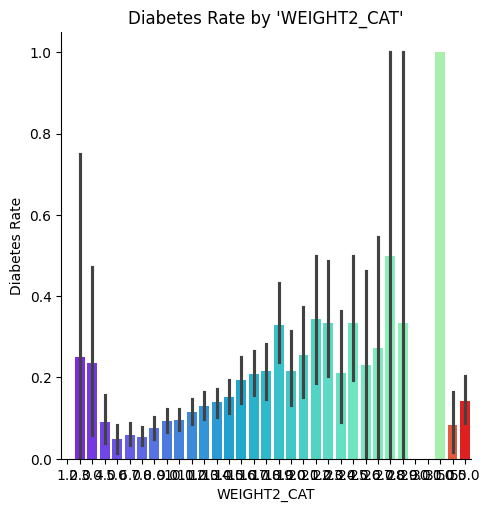

In [ ]:
# WEIGHT2_CAT
plotter_ind(tmp_df, "WEIGHT2_CAT")

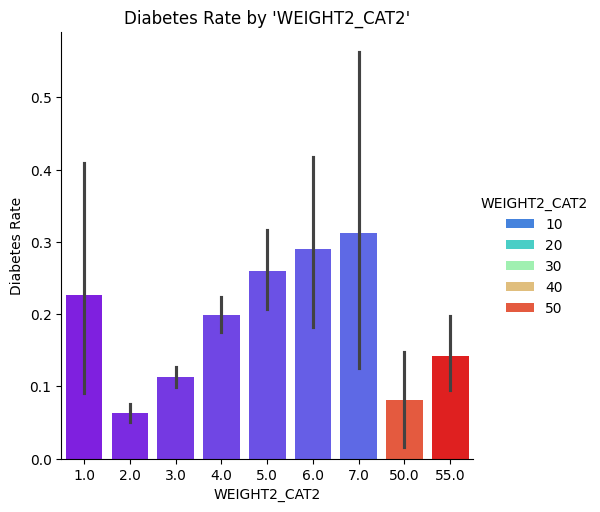

In [ ]:
# WEIGHT2_CAT2
plotter_ind(tmp_df, "WEIGHT2_CAT2")

Even after adjusting all `'WEIGHT2'` values to pounds, our `'WEIGHT2_CAT'` variable is much better suited to the data than the initial `'WEIGHT2'` variable.  Additionally, though our experimental broader `'WEIGHT2_CAT2'` did have less variability than our `'WEIGHT2_CAT'` variable, it is not even half as correlated with `'DIABETE_SIMP'`.  Let's drop `'WEIGHT2'`.  We will hold onto `'WEIGHT2_CAT2'` for now.

In [ ]:
# dropping
tmp_df.drop("WEIGHT2", axis=1, inplace=True)

In [ ]:
# verify columns
tmp_df.columns

Index(['DIABETE_SIMP', 'NUMADULT', 'DRVISITS', '_RACE', 'MSCODE', 'FLUSHOT6',
       'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY',
       'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE',
       'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT',
       'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3',
       'WEIGHT2_CAT', 'WEIGHT2_CAT2', 'CHILDREN_SIMP'],
      dtype='object')

#### **Variable:** `'CHILDREN'`

**Numeric variable**

"How many children less than 18 years of age live in your household?"

**Possible Responses:**
- 1 to 87 - "Number of children (Notes: _ _ = Number of children)"
- 88 - "None"
- 99 - "Refused"

In [ ]:
# CHILDREN counts
give_counts(tmp_df, "CHILDREN")

Counts for 'CHILDREN' are as follows:
The number of people who answered 1.0 for 'CHILDREN' is 506.
The number of people who answered 2.0 for 'CHILDREN' is 458.
The number of people who answered 3.0 for 'CHILDREN' is 184.
The number of people who answered 4.0 for 'CHILDREN' is 61.
The number of people who answered 99.0 for 'CHILDREN' is 21.
The number of people who answered 5.0 for 'CHILDREN' is 20.
The number of people who answered 6.0 for 'CHILDREN' is 14.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 2.
The number of people who answered 88.0 for 'CHILDREN' is 3558.
The number of people who did not answer for 'CHILDREN' is 1.
The total number of entries is 4828.


**Drop Rationale**

There is only one patient who did not answer for number of children.  

In [ ]:
# dropping rows with missing data
tmp_df = row_drop(df=tmp_df, variable="CHILDREN", lb=0.0)

Count before dropping any rows from the length of 'CHILDREN': 4828
...
...
...

Count after dropping rows from 'CHILDREN': 4827


Let's transform `'88.0'` to `'0.0'` and create a new, even more temporary DataFrame for just this variable plot that exclude responses of `'99.0'`.

In [ ]:
# dropping rows with missing data
tmp_df = row_drop(df=tmp_df, variable="CHILDREN", lb=0.0, ub=98.0)

Count before dropping any rows from the length of 'CHILDREN': 4827
...
...
...

Count after dropping rows from 'CHILDREN': 4806


In [ ]:
# transform the CHILDREN variable
li1 = tmp_df["CHILDREN"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 88.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

tmp_df.drop("CHILDREN", axis=1, inplace=True)
tmp_df["CHILDREN"] = li2

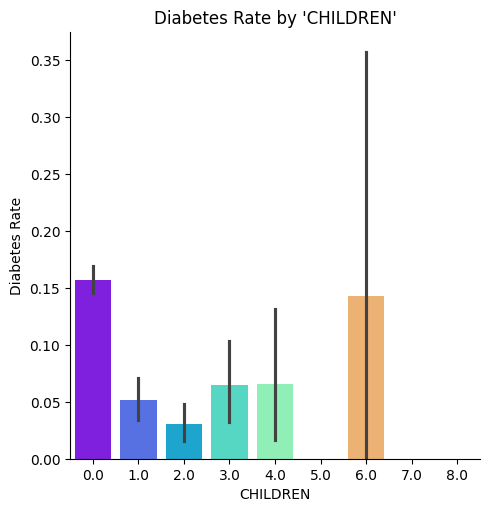

In [ ]:
# CHILDREN_SIMP
plotter_ind(tmp_df, "CHILDREN")

The plot above has increasing variance as the number of children increases.  Given this variance it is hard to see clear trends.  There may be a difference between the rates of folks with diabetes along the line of parenthood vs non-parenthood.  Let's check real quick.

In [ ]:
# transform the CHILDREN variable
li1 = tmp_df["CHILDREN"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 0.0:
    li2.append(0.0)
  else:
    li2.append(1.0)

tmp_df["CHILDREN_SIMP"] = li2

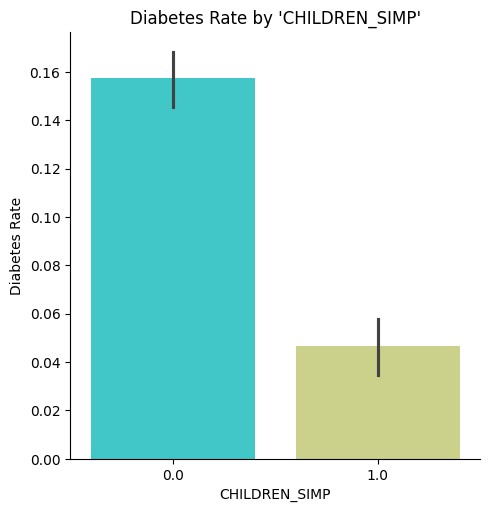

In [ ]:
# CHILDREN_SIMP_2
plotter_ind(tmp_df, "CHILDREN_SIMP")

There does appear to be some difference between diabetes rates for people who have kids vs those without.  `'CHILDREN_SIMP'` might be more useful to our model than `'CHILDREN'`.

In [ ]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
tmp_df.corr()['DIABETE_SIMP'].abs().sort_values()

HLTHCVR1         0.000644
RENTHOM1         0.002462
INCOME2          0.003272
MSCODE           0.004683
_STATE           0.007975
WEIGHT2_CAT2     0.013479
MARITAL          0.015476
SLEPTIM1         0.018783
_RACE            0.019761
SEX              0.019999
_SMOKER3         0.022054
HLTHPLN1         0.022255
DECIDE           0.027987
CHCKIDNY         0.029379
MENTHLTH         0.031982
DRVISITS         0.034158
ASTHMA3          0.035469
BLIND            0.036635
FLUSHOT6         0.045675
CVDCRHD4         0.048850
ADDEPEV2         0.063500
NUMADULT         0.068761
_EDUCAG          0.080042
WEIGHT2_CAT      0.080504
CHECKUP1         0.095424
EXERANY2         0.101521
CHILDREN         0.119085
USEEQUIP         0.141540
CHILDREN_SIMP    0.145282
_BMI5CAT         0.212990
EMPLOY1          0.215250
_AGEG5YR         0.217333
GENHLTH          0.290220
DIABETE_SIMP     1.000000
Name: DIABETE_SIMP, dtype: float64

According to our rankings, `'CHILDREN_SIMP'` has more correlation with `'DIABETE_SIMP'` than `'CHILDREN'`.  It also has much less variability.  Let's drop `'CHILDREN'` from our dataframe.

In [ ]:
# dropping
tmp_df.drop("CHILDREN", axis=1, inplace=True)

In [ ]:
# verify columns
tmp_df.columns

Index(['DIABETE_SIMP', 'NUMADULT', 'DRVISITS', '_RACE', 'MSCODE', 'FLUSHOT6',
       'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY',
       'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE',
       'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT',
       'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3',
       'WEIGHT2_CAT', 'WEIGHT2_CAT2', 'CHILDREN_SIMP'],
      dtype='object')

#### **Variable:** `'_BMI5CAT'`

**Categorical variable**

"Four-categories of Body Mass Index (BMI)"

**Possible Responses:**
- 1 - "Underweight (Notes: `'_BMI5'` < 18.50 (`'_BMI5'` has 2 implied decimal places))"
- 2 - "Normal Weight (Notes: 18.50 <= `'_BMI5'` < 25.00)"
- 3 - "Overweight (Notes: 25.00 <= `'_BMI5'` < 30.00)"
- 4 - "Obese (Notes: 30.00 <= `'_BMI5'` <= 99.99)"

In [ ]:
# _BMI5CAT counts
give_counts(tmp_df, "_BMI5CAT")

Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 84.
The number of people who answered 2.0 for '_BMI5CAT' is 1515.
The number of people who answered 3.0 for '_BMI5CAT' is 1611.
The number of people who answered 4.0 for '_BMI5CAT' is 1343.
The number of people who did not answer for '_BMI5CAT' is 253.
The total number of entries is 4806.


**Fill Rationale**

Let's create another super temporary dataframe and fill the missing `'_BMI5CAT'` responses from it.  We are going to fill these missing entries with the median value for `'_BMI5CAT'` of other entries that are in the same `'EXERANY2'` and `'WEIGHT2_CAT'` brackets.  The idea here is that a BMI usually has some decent correlation with activity level and mass.  

In [ ]:
# before dropping
print("Before filling:")

# _BMI5CAT counts
give_counts(tmp_df, "_BMI5CAT")

# Filling code - first by 'WEIGHT2_CAT'
tmp_df['_BMI5CAT'].fillna(tmp_df.groupby(['EXERANY2', 'WEIGHT2_CAT'])['_BMI5CAT'].transform('median'), inplace=True)

# after dropping
print("\nAfter filling:")

# _BMI5CAT counts
give_counts(tmp_df, "_BMI5CAT")

Before filling:
Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 84.
The number of people who answered 2.0 for '_BMI5CAT' is 1515.
The number of people who answered 3.0 for '_BMI5CAT' is 1611.
The number of people who answered 4.0 for '_BMI5CAT' is 1343.
The number of people who did not answer for '_BMI5CAT' is 253.
The total number of entries is 4806.

After filling:
Counts for '_BMI5CAT' are as follows:
The number of people who answered 1.0 for '_BMI5CAT' is 85.
The number of people who answered 2.0 for '_BMI5CAT' is 1542.
The number of people who answered 3.0 for '_BMI5CAT' is 1632.
The number of people who answered 4.0 for '_BMI5CAT' is 1346.
The number of people who did not answer for '_BMI5CAT' is 201.
The total number of entries is 4806.


There seems to be something wrong, the only way there would be leftover values unfilled is if every patient who answered some specific value for either `'WEIGHT2_CAT'` or `'EXERANY2'` also did not have a `'_BMI5CAT'` measurement.  Let's do some quick investigating.  

In [ ]:
len(np.where((tmp_df["WEIGHT2_CAT"] >= 50) & ~(tmp_df["_BMI5CAT"] >= 0))[0])

201

In [ ]:
len(np.where((tmp_df["WEIGHT2_CAT"] >= 50) & (tmp_df["_BMI5CAT"] >= 0))[0])

0

Yep! This is exactly what happened to us.  Let's drop the rest of the missing `'_BMI5CAT'` variables, which will clean up our `'WEIGHT2_CAT'` variable as well.  

In [ ]:
# dropping missing values
tmp_df = row_drop(df=tmp_df, variable="_BMI5CAT", lb=0.0)

Count before dropping any rows from the length of '_BMI5CAT': 4806
...
...
...

Count after dropping rows from '_BMI5CAT': 4605


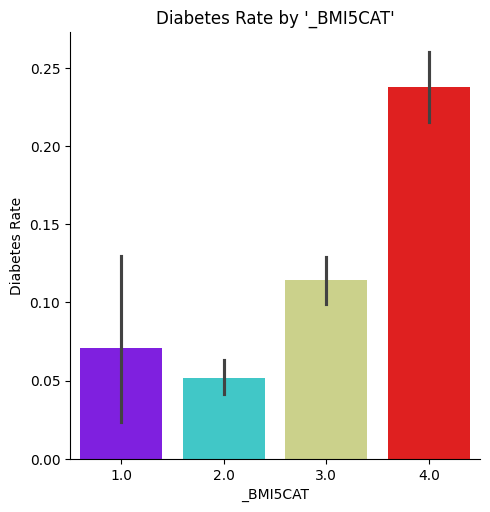

In [ ]:
# _BMI5CAT
plotter_ind(tmp_df, "_BMI5CAT")

This data is looking awful parabolic, though with the variability seen in the `1.0` category, that could be a mirage.  Further studies may want to look into a transformation for `'_BMI5CAT'`.

#### **Variable:** `'_AGEG5YR'`

**Categorical variable**

"Fourteen-level age category"

**Possible Responses:**
- 1 - Age 18 to 24 (Notes: 18 <= `'AGE'` <= 24)
- 2 - Age 25 to 29 (Notes: 25 <= `'AGE'` <= 29)
- 3 - Age 30 to 34 (Notes: 30 <= `'AGE'` <= 34)
- 4 - Age 35 to 39 (Notes: 35 <= `'AGE'` <= 39)
- 5 - Age 40 to 44 (Notes: 40 <= `'AGE'` <= 44)
- 6 - Age 45 to 49 (Notes: 45 <= `'AGE'` <= 49)
- 7 - Age 50 to 54 (Notes: 50 <= `'AGE'` <= 54)
- 8 - Age 55 to 59 (Notes: 55 <= `'AGE'` <= 59)
- 9 - Age 60 to 64 (Notes: 60 <= `'AGE'` <= 64)
- 10 - Age 65 to 69 (Notes: 65 <= `'AGE'` <= 69)
- 11 - Age 70 to 74 (Notes: 70 <= `'AGE'` <= 74)
- 12 - Age 75 to 79 (Notes: 75 <= `'AGE'` <= 79)
- 13 - Age 80 or older (Notes: 80 <= `'AGE'` <= 99)
- 14 - Don't know/Refused/Missing

In [ ]:
# _AGEG5YR counts
give_counts(tmp_df, "_AGEG5YR")

Counts for '_AGEG5YR' are as follows:
The number of people who answered 1.0 for '_AGEG5YR' is 260.
The number of people who answered 2.0 for '_AGEG5YR' is 214.
The number of people who answered 3.0 for '_AGEG5YR' is 208.
The number of people who answered 4.0 for '_AGEG5YR' is 244.
The number of people who answered 5.0 for '_AGEG5YR' is 265.
The number of people who answered 6.0 for '_AGEG5YR' is 330.
The number of people who answered 7.0 for '_AGEG5YR' is 430.
The number of people who answered 8.0 for '_AGEG5YR' is 479.
The number of people who answered 9.0 for '_AGEG5YR' is 511.
The number of people who answered 10.0 for '_AGEG5YR' is 538.
The number of people who answered 11.0 for '_AGEG5YR' is 405.
The number of people who answered 12.0 for '_AGEG5YR' is 289.
The number of people who answered 13.0 for '_AGEG5YR' is 411.
The number of people who answered 14.0 for '_AGEG5YR' is 21.
The number of people who did not answer for '_AGEG5YR' is 0.
The total number of entries is 4605.


Since there are only 21 of them, let's drop the people who don't know or refuse to answer.

In [ ]:
# dropping missing values
tmp_df = row_drop(df=tmp_df, variable="_AGEG5YR", lb=0.0, ub=13.0)

Count before dropping any rows from the length of '_AGEG5YR': 4605
...
...
...

Count after dropping rows from '_AGEG5YR': 4584


Plot it!

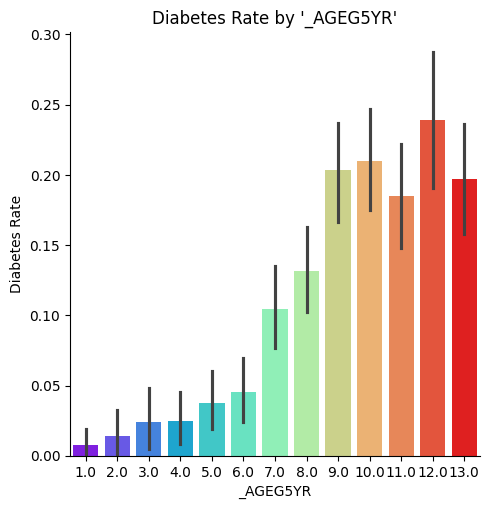

In [ ]:
# _AGEG5YR
plotter_ind(tmp_df, "_AGEG5YR")

Awesome!  The distribution of rates of diabetes is skewed towards people who fall into the older age categories (in line with general expectation of health concerns in aging folks).    

#### **Variable:** `'EMPLOY1'`



**Categorical variable**

"Are you currently…?" [Question about employment]

**Possible Responses:**
- 1 - Employed for wages
- 2 - Self-employed
- 3 - Out of work for 1 year or more
- 4 - Out of work for less than 1 year
- 5 - A homemaker
- 6 - A student
- 7 - Retired
- 8 - Unable to work
- 9 - Refused

In [ ]:
# EMPLOY1 counts
give_counts(tmp_df, "EMPLOY1")

Counts for 'EMPLOY1' are as follows:
The number of people who answered 1.0 for 'EMPLOY1' is 1851.
The number of people who answered 2.0 for 'EMPLOY1' is 389.
The number of people who answered 3.0 for 'EMPLOY1' is 115.
The number of people who answered 4.0 for 'EMPLOY1' is 96.
The number of people who answered 5.0 for 'EMPLOY1' is 276.
The number of people who answered 6.0 for 'EMPLOY1' is 97.
The number of people who answered 7.0 for 'EMPLOY1' is 1433.
The number of people who answered 8.0 for 'EMPLOY1' is 309.
The number of people who answered 9.0 for 'EMPLOY1' is 18.
The number of people who did not answer for 'EMPLOY1' is 0.
The total number of entries is 4584.


After the pruning we have done so far, there are no more `'nan'` entries for `'EMPLOY1'`.  And since `'EMPLOY1'` is strictly categorical, the only argument for dropping theose who refused to answer is that it is a small sample size.  We wont drop it for now.  

Plot it!

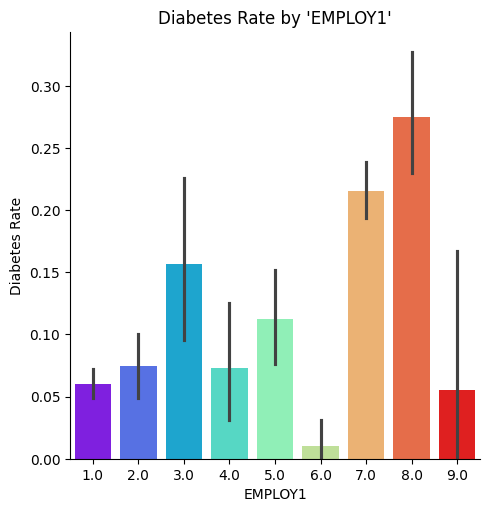

In [ ]:
# EMPLOY1
plotter_ind(tmp_df, "EMPLOY1")

There's clearly an effect at play here.  Each category of employment is complete independent.  Category `'6.0'` makes sense because students are generally young.  Likewise, category `'8.0'` makes sense because disability is one of the primary reasons for a person to be unable to work and diabetes can be a disabling condition.  Since the variability caused by the low number of respondents who refused to answer (`'9.0'` responses) is so great, we will drop those responses.  

In [ ]:
# drop 9.0 responses
tmp_df = row_drop(tmp_df, "EMPLOY1", 0.0, 8.0)

Count before dropping any rows from the length of 'EMPLOY1': 4584
...
...
...

Count after dropping rows from 'EMPLOY1': 4566


#### **Variable:** `'GENHLTH'`

**Categorical variable**

"Would you say that in general your health is:" [Question about general health]

**Possible Responses:**
- 1 - Excellent
- 2 - Very good
- 3 - Good
- 4 - Fair
- 5 - Poor
- 7 - Don't know/Not Sure
- 9 - Refused

In [ ]:
# GENHLTH counts
give_counts(tmp_df, "GENHLTH")

Counts for 'GENHLTH' are as follows:
The number of people who answered 1.0 for 'GENHLTH' is 831.
The number of people who answered 2.0 for 'GENHLTH' is 1528.
The number of people who answered 3.0 for 'GENHLTH' is 1368.
The number of people who answered 4.0 for 'GENHLTH' is 626.
The number of people who answered 5.0 for 'GENHLTH' is 225.
The number of people who answered 7.0 for 'GENHLTH' is 6.
The number of people who did not answer for 'GENHLTH' is 0.
The total number of entries is 4584.


Dropping the 7.0 responses as there are too few for the model to get much actionable data.

In [ ]:
# drop 7.0 responses
tmp_df = row_drop(tmp_df, "GENHLTH", 0.0, 5.0)

Count before dropping any rows from the length of 'GENHLTH': 4566
...
...
...

Count after dropping rows from 'GENHLTH': 4560


Plot it!

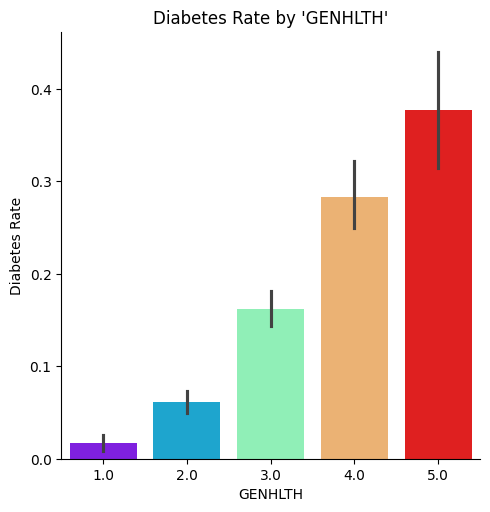

In [ ]:
# GENHLTH
plotter_ind(tmp_df, "GENHLTH")

This shows a clear and linear increase in the risk of diabetes as one moves up `'GENHLTH'` categories (get's unhealthier).  This is the stuff we like to see when trying to determine which variables are most highly associated with developing diabetes.

#### **Let's take a quick check-in with our plots**

In [ ]:
tmp_df.columns

Index(['DIABETE_SIMP', 'NUMADULT', 'DRVISITS', '_RACE', 'MSCODE', 'FLUSHOT6',
       'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY',
       'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE',
       'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT',
       'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3',
       'WEIGHT2_CAT', 'WEIGHT2_CAT2', 'CHILDREN_SIMP'],
      dtype='object')

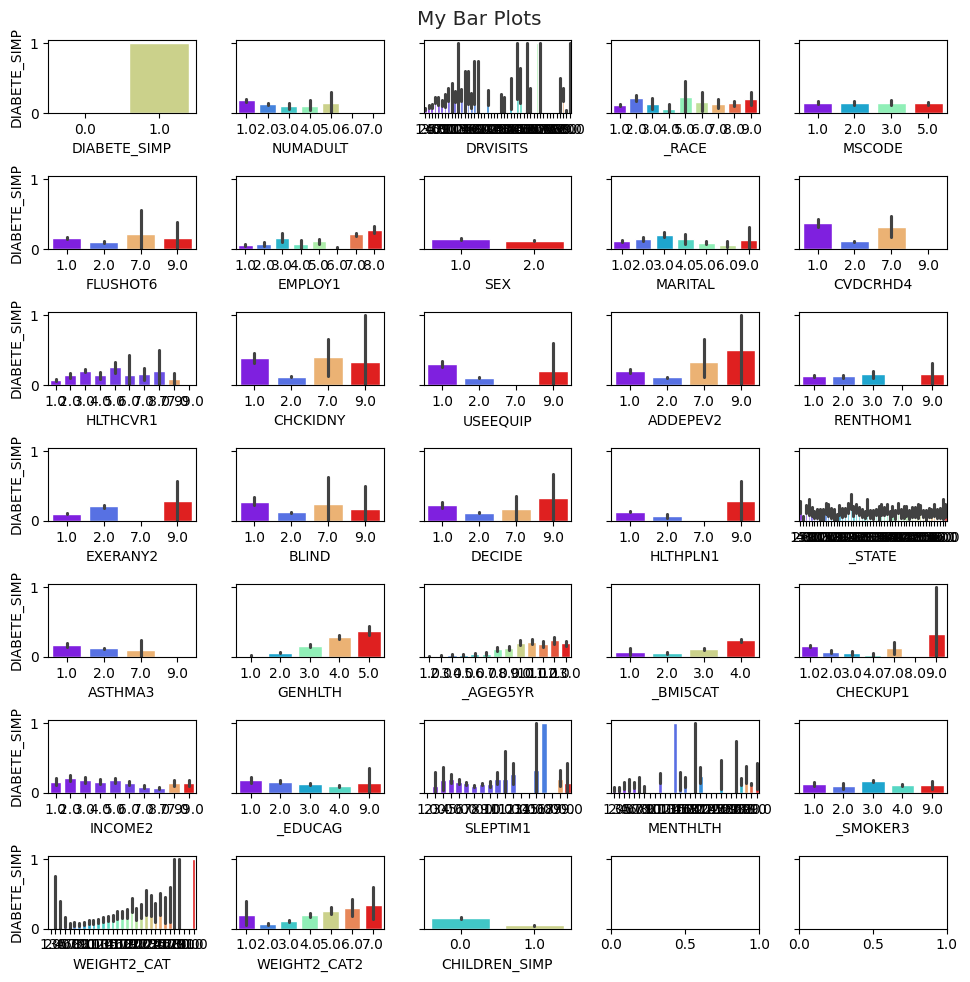

In [ ]:
# plot builder
plotter_big(tmp_df, "DIABETE_SIMP")

Some marginal improvement across the variables we have looked at so far.  Let's keep it going!

Let's save our `tmp_df` to a `.csv` file, we've done some good pruning already.  

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
tmp_df.to_csv("drive/My Drive/Diabetes Risk Factors/diabetes_data_post_visualization.csv", index=False)

### Dealing With Missing Data

In the following code we will look at our variables and decide which are worth filling, which we should drop, and justify how we are doing so.  Let's start by recalling our complete dataframe and adding up our missing values.

In [ ]:
# dataframe
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/diabetes_data_post_visualization.csv")

# sum missing data
df.isna().sum()

DIABETE_SIMP        0
NUMADULT         1613
DRVISITS         1316
_RACE               2
MSCODE           1661
FLUSHOT6          149
EMPLOY1             0
SEX                 0
MARITAL             0
CVDCRHD4            0
HLTHCVR1         1532
CHCKIDNY            0
USEEQUIP           88
ADDEPEV2            0
RENTHOM1           36
EXERANY2            0
BLIND              95
DECIDE             95
HLTHPLN1            0
_STATE              0
ASTHMA3             0
GENHLTH             0
_AGEG5YR            0
_BMI5CAT            0
CHECKUP1            0
INCOME2             0
_EDUCAG             0
SLEPTIM1            0
MENTHLTH            0
_SMOKER3            0
WEIGHT2_CAT         0
WEIGHT2_CAT2        0
CHILDREN_SIMP       0
dtype: int64

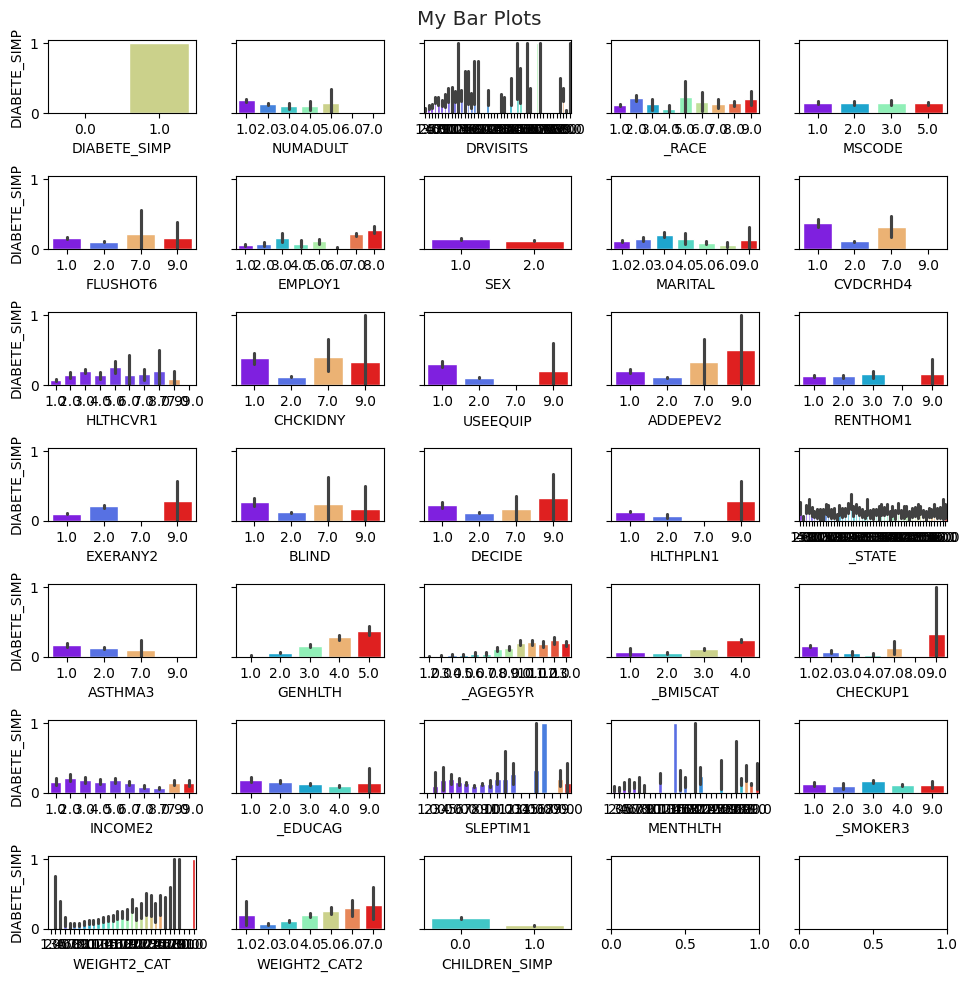

In [ ]:
### PLOT BUILD
plotter_big(df, "DIABETE_SIMP")

#### **Variable:** `'_RACE'`

**Categorical variable**

"Race/ethnicity categories"

**Variable Responses:**

- 1 - White only, non-Hispanic

- 2 - Black only, non-Hispanic

- 3 - American Indian or Alaskan Native only, Non-Hispanic

- 4 - Asian only, non-Hispanic

- 5 - Native Hawaiian or other Pacific Islander only, Non-Hispanic

- 6 - Other race only, non-Hispanic

- 7 - Multiracial, non-Hispanic

- 8 - Hispanic

- 9 - Don't know/Not sure/Refused


In [ ]:
# _RACE counts
give_counts(df, "_RACE")

Counts for '_RACE' are as follows:
The number of people who answered 1.0 for '_RACE' is 3544.
The number of people who answered 2.0 for '_RACE' is 327.
The number of people who answered 3.0 for '_RACE' is 78.
The number of people who answered 4.0 for '_RACE' is 78.
The number of people who answered 5.0 for '_RACE' is 13.
The number of people who answered 6.0 for '_RACE' is 26.
The number of people who answered 7.0 for '_RACE' is 96.
The number of people who answered 8.0 for '_RACE' is 333.
The number of people who answered 9.0 for '_RACE' is 63.
The number of people who did not answer for '_RACE' is 2.
The total number of entries is 4560.


**Drop Rationale**

Since we are only missing two entries for `'_RACE'`, we think it better to drop the missing values instead of trying to guess.  We also recognize that for the purposes of training a robust model there are too few respondents who answered `5.0` (Native Hawaiian or other Pacific Islander only, Non-Hispanic), but we find it ethically quite fuzzy to remove any specific race from the data.  Therefore, though there will be no specific insight gleaned along racial lines for `5.0` respondents, their other metrics will still be included in the final analysis.

In [ ]:
# dropping
df = row_drop(df, "_RACE", 0.0, 10.0)

Count before dropping any rows from the length of '_RACE': 4560
...
...
...

Count after dropping rows from '_RACE': 4558


Nice, next up!

#### **Variable:** `'BLIND'`

**Categorical variable**

"Are you blind or do you have serious difficulty seeing, even when wearing glasses?"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [ ]:
# BLIND counts
give_counts(df, "BLIND")

Counts for 'BLIND' are as follows:
The number of people who answered 1.0 for 'BLIND' is 224.
The number of people who answered 2.0 for 'BLIND' is 4225.
The number of people who answered 7.0 for 'BLIND' is 8.
The number of people who answered 9.0 for 'BLIND' is 6.
The number of people who did not answer for 'BLIND' is 95.
The total number of entries is 4558.


**Drop Rationale**

Since we are missing fewer than 100 entries for `'BLIND'` and we still have a DataFrame with 4500+ rows, we again think it better to drop the missing values instead of trying to guess.  We were slightly torn about this, but there didn't seem to be a reliable enough marker to justify marking some of these yes, and some no.  We are also going to drop the 7.0 and 9.0 answers as there aren't enough entries to train our model anyway.  

In [ ]:
# dropping
df = row_drop(df, "BLIND", 0.0, 3.0)

Count before dropping any rows from the length of 'BLIND': 4558
...
...
...

Count after dropping rows from 'BLIND': 4449


#### **Variable:** `'FLUSHOT6'`

**Categorical variable**

"During the past 12 months, have you had either a flu shot or a flu vaccine that was sprayed in your nose? (A new flu shot came out in 2011 that injects vaccine into the skin with a very small needle. It is called Fluzone Intradermal vaccine. This is also considered a flu shot.)"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [ ]:
# FLUSHOT6 counts
give_counts(df, "FLUSHOT6")

Counts for 'FLUSHOT6' are as follows:
The number of people who answered 1.0 for 'FLUSHOT6' is 2069.
The number of people who answered 2.0 for 'FLUSHOT6' is 2308.
The number of people who answered 7.0 for 'FLUSHOT6' is 9.
The number of people who answered 9.0 for 'FLUSHOT6' is 10.
The number of people who did not answer for 'FLUSHOT6' is 53.
The total number of entries is 4449.


**Drop Rationale**

Since we are missing fewer than 100 entries for `'FLUSHOT6'` and a median wouldn't really make too much sense here, we are going to drop rows containing said missing entries.  We are also going to drop 7.0 and 9.0 entries as there are far too few for our model to make use of.

In [ ]:
# dropping
df = row_drop(df, "FLUSHOT6", 0.0, 3.0)

Count before dropping any rows from the length of 'FLUSHOT6': 4449
...
...
...

Count after dropping rows from 'FLUSHOT6': 4377


#### **Variable:** `'DRVISITS'`

**Numeric variable**

"How many times have you been to a doctor, nurse, or other health professional in the past 12 months?"

**Possible responses:**
- 1 - 76 - Number of times
- 88 - None
- 77 - Dont know/Not Sure

In [ ]:
# DRVISITS counts
give_counts(df, "DRVISITS")

Counts for 'DRVISITS' are as follows:
The number of people who answered 1.0 for 'DRVISITS' is 496.
The number of people who answered 2.0 for 'DRVISITS' is 528.
The number of people who answered 3.0 for 'DRVISITS' is 382.
The number of people who answered 4.0 for 'DRVISITS' is 347.
The number of people who answered 5.0 for 'DRVISITS' is 174.
The number of people who answered 6.0 for 'DRVISITS' is 226.
The number of people who answered 7.0 for 'DRVISITS' is 58.
The number of people who answered 8.0 for 'DRVISITS' is 78.
The number of people who answered 9.0 for 'DRVISITS' is 16.
The number of people who answered 10.0 for 'DRVISITS' is 101.
The number of people who answered 11.0 for 'DRVISITS' is 3.
The number of people who answered 12.0 for 'DRVISITS' is 111.
The number of people who answered 13.0 for 'DRVISITS' is 5.
The number of people who answered 14.0 for 'DRVISITS' is 15.
The number of people who answered 15.0 for 'DRVISITS' is 41.
The number of people who answered 16.0 for 'DRVISI

With so many missing entries filling missing data could backfire.  Let's take a quick look at the current significance of this variable before we decide.  

In [ ]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2          0.000673
HLTHCVR1         0.000705
RENTHOM1         0.004098
MARITAL          0.008084
MSCODE           0.009140
_STATE           0.010775
_SMOKER3         0.011124
HLTHPLN1         0.018572
SLEPTIM1         0.019726
DRVISITS         0.027170
SEX              0.028823
MENTHLTH         0.031818
ASTHMA3          0.032366
_RACE            0.034928
CHCKIDNY         0.039190
CVDCRHD4         0.050028
DECIDE           0.058456
ADDEPEV2         0.065228
FLUSHOT6         0.074189
NUMADULT         0.078433
_EDUCAG          0.079210
BLIND            0.098022
CHECKUP1         0.107502
EXERANY2         0.119058
CHILDREN_SIMP    0.148083
USEEQUIP         0.171514
WEIGHT2_CAT2     0.180671
WEIGHT2_CAT      0.189784
_BMI5CAT         0.212860
EMPLOY1          0.220692
_AGEG5YR         0.222657
GENHLTH          0.300841
DIABETE_SIMP     1.000000
Name: DIABETE_SIMP, dtype: float64

**Can we make it a more reliable variable?**

Let's try assigning 88.0 as 0.0 and everything between 11.0 and 76.0 as 11.0 (to indicate 11 or more appointments in a year).  

In [ ]:
# transform the DRVISITS variable
li1 = df["DRVISITS"]
li2 = []

for i in range(len(li1)):
  if li1[i] <= 88.0:
    if li1[i] == 88.0:
      li2.append(0.0)
    elif li1[i] == 77.0:
      li2.append(77.0)
    elif li1[i] < 77.0 and li1[i] >= 11.0:
      li2.append(11.0)
    else:
      li2.append(li1[i])
  else:
    li2.append(li1[i])

#df.drop("DRVISITS", axis=1, inplace=True)
df["DRVISITS_SIMP"] = li2

In [ ]:
# counts
give_counts(df, "DRVISITS_SIMP")

Counts for 'DRVISITS_SIMP' are as follows:
The number of people who answered 0.0 for 'DRVISITS_SIMP' is 288.
The number of people who answered 1.0 for 'DRVISITS_SIMP' is 496.
The number of people who answered 2.0 for 'DRVISITS_SIMP' is 528.
The number of people who answered 3.0 for 'DRVISITS_SIMP' is 382.
The number of people who answered 4.0 for 'DRVISITS_SIMP' is 347.
The number of people who answered 5.0 for 'DRVISITS_SIMP' is 174.
The number of people who answered 6.0 for 'DRVISITS_SIMP' is 226.
The number of people who answered 7.0 for 'DRVISITS_SIMP' is 58.
The number of people who answered 8.0 for 'DRVISITS_SIMP' is 78.
The number of people who answered 9.0 for 'DRVISITS_SIMP' is 16.
The number of people who answered 10.0 for 'DRVISITS_SIMP' is 101.
The number of people who answered 11.0 for 'DRVISITS_SIMP' is 345.
The number of people who answered 77.0 for 'DRVISITS_SIMP' is 75.
The number of people who answered 99.0 for 'DRVISITS_SIMP' is 3.
The number of people who did not an

In [ ]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2          0.000673
HLTHCVR1         0.000705
RENTHOM1         0.004098
MARITAL          0.008084
MSCODE           0.009140
_STATE           0.010775
_SMOKER3         0.011124
HLTHPLN1         0.018572
SLEPTIM1         0.019726
DRVISITS         0.027170
SEX              0.028823
MENTHLTH         0.031818
ASTHMA3          0.032366
_RACE            0.034928
CHCKIDNY         0.039190
CVDCRHD4         0.050028
DECIDE           0.058456
ADDEPEV2         0.065228
FLUSHOT6         0.074189
NUMADULT         0.078433
_EDUCAG          0.079210
BLIND            0.098022
CHECKUP1         0.107502
DRVISITS_SIMP    0.118772
EXERANY2         0.119058
CHILDREN_SIMP    0.148083
USEEQUIP         0.171514
WEIGHT2_CAT2     0.180671
WEIGHT2_CAT      0.189784
_BMI5CAT         0.212860
EMPLOY1          0.220692
_AGEG5YR         0.222657
GENHLTH          0.300841
DIABETE_SIMP     1.000000
Name: DIABETE_SIMP, dtype: float64

Clearly our refinement has increased the correlation of the initial variable.

**Quick Visualization**

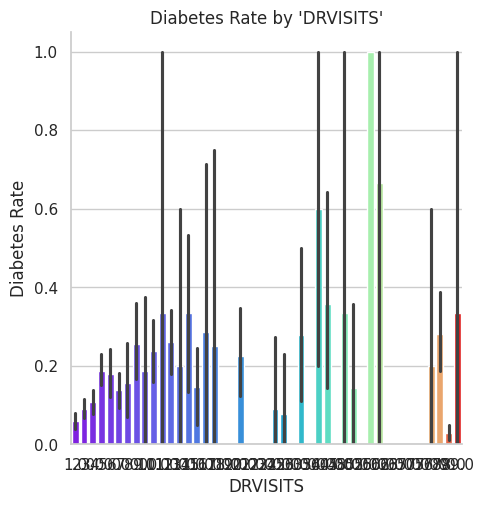

In [ ]:
# DRVISITS
plotter_ind(df, "DRVISITS")

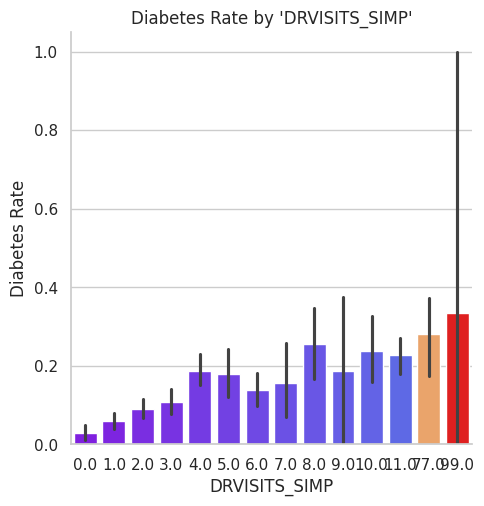

In [ ]:
# DRVISITS_SIMP
plotter_ind(df, "DRVISITS_SIMP")

Notice the improvement in variability between these two plots.  And with a correlation of `0.118772` (vs the initial `0.027170`), `'DRVISITS_SIMP'` has become too important to simply drop instead of trying to fill.  Let's fill our
missing values with the median value of our 0.0 to 11.0 entries.  

In [ ]:
# find median
df_tmp = df[:].copy()

df_tmp["DRVISITS_SIMP"].dropna(inplace=True)

df_tmp = df_tmp[df_tmp.DRVISITS_SIMP <= 11.0]

med_num = df_tmp["DRVISITS_SIMP"].median()

print(f"The median value of this set is {med_num}")

# Filling code - by median of entries 0.0 through 11.0
df['DRVISITS_SIMP'].fillna(med_num, inplace=True)

The median value of this set is 3.0


In [ ]:
# counts
give_counts(df, "DRVISITS_SIMP")

Counts for 'DRVISITS_SIMP' are as follows:
The number of people who answered 0.0 for 'DRVISITS_SIMP' is 288.
The number of people who answered 1.0 for 'DRVISITS_SIMP' is 496.
The number of people who answered 2.0 for 'DRVISITS_SIMP' is 528.
The number of people who answered 3.0 for 'DRVISITS_SIMP' is 1642.
The number of people who answered 4.0 for 'DRVISITS_SIMP' is 347.
The number of people who answered 5.0 for 'DRVISITS_SIMP' is 174.
The number of people who answered 6.0 for 'DRVISITS_SIMP' is 226.
The number of people who answered 7.0 for 'DRVISITS_SIMP' is 58.
The number of people who answered 8.0 for 'DRVISITS_SIMP' is 78.
The number of people who answered 9.0 for 'DRVISITS_SIMP' is 16.
The number of people who answered 10.0 for 'DRVISITS_SIMP' is 101.
The number of people who answered 11.0 for 'DRVISITS_SIMP' is 345.
The number of people who answered 99.0 for 'DRVISITS_SIMP' is 3.
The number of people who answered 77.0 for 'DRVISITS_SIMP' is 75.
The number of people who did not a

Let's now drop the 3 entries for 99.0 (Refused to answer) as the variability with so few entries is insurmountable.  We will leave 9.0 in as an option because we don't want an arbitrary hole in our data.  

In [ ]:
# dropping
df = row_drop(df, "DRVISITS_SIMP", 0, 90)

Count before dropping any rows from the length of 'DRVISITS_SIMP': 4377
...
...
...

Count after dropping rows from 'DRVISITS_SIMP': 4374


Checking...

In [ ]:
# DRVISITS counts
give_counts(df, "DRVISITS_SIMP")

Counts for 'DRVISITS_SIMP' are as follows:
The number of people who answered 0.0 for 'DRVISITS_SIMP' is 288.
The number of people who answered 1.0 for 'DRVISITS_SIMP' is 496.
The number of people who answered 2.0 for 'DRVISITS_SIMP' is 528.
The number of people who answered 3.0 for 'DRVISITS_SIMP' is 1642.
The number of people who answered 4.0 for 'DRVISITS_SIMP' is 347.
The number of people who answered 5.0 for 'DRVISITS_SIMP' is 174.
The number of people who answered 6.0 for 'DRVISITS_SIMP' is 226.
The number of people who answered 7.0 for 'DRVISITS_SIMP' is 58.
The number of people who answered 8.0 for 'DRVISITS_SIMP' is 78.
The number of people who answered 9.0 for 'DRVISITS_SIMP' is 16.
The number of people who answered 10.0 for 'DRVISITS_SIMP' is 101.
The number of people who answered 11.0 for 'DRVISITS_SIMP' is 345.
The number of people who answered 77.0 for 'DRVISITS_SIMP' is 75.
The number of people who did not answer for 'DRVISITS_SIMP' is 0.
The total number of entries is 43

One last tweak to see if we can improve the variable.  Here we will decide whether or not to create a 9+ visits to the doctor category rather than our 11+ visits variable.  

In [ ]:
# transform the DRVISITS_SIMP variable
li1 = df["DRVISITS_SIMP"]
li2 = []

for i in range(len(li1)):
  if li1[i] < 77.0:
    if li1[i] <= 8.0:
      li2.append(li1[i])
    else:
      li2.append(9.0)
  else:
    li2.append(li1[i])

#df.drop("DRVISITS_SIMP", axis=1, inplace=True)
df["DRVISITS_SIMP_2"] = li2

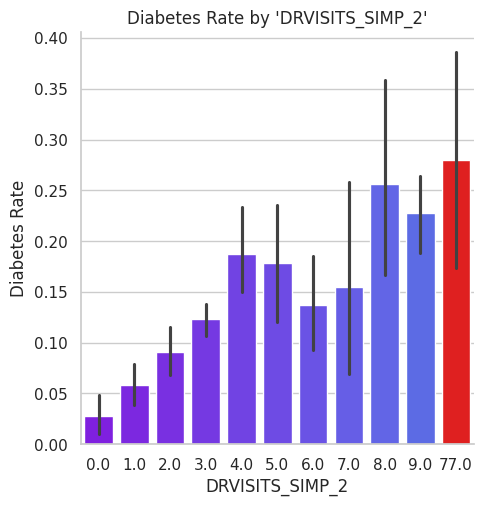

In [ ]:
# DRVISITS_SIMP_2
plotter_ind(df, "DRVISITS_SIMP_2")

In [ ]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

HLTHCVR1           0.000721
INCOME2            0.002507
RENTHOM1           0.004540
MARITAL            0.007983
MSCODE             0.010219
_STATE             0.011168
_SMOKER3           0.011401
HLTHPLN1           0.018507
SLEPTIM1           0.019752
DRVISITS           0.029132
SEX                0.029211
MENTHLTH           0.031429
ASTHMA3            0.032482
_RACE              0.035134
CHCKIDNY           0.039242
CVDCRHD4           0.050265
DECIDE             0.058574
ADDEPEV2           0.065638
FLUSHOT6           0.074663
NUMADULT           0.077684
_EDUCAG            0.078812
DRVISITS_SIMP_2    0.095121
BLIND              0.098197
DRVISITS_SIMP      0.099513
CHECKUP1           0.107401
EXERANY2           0.118370
CHILDREN_SIMP      0.147656
USEEQUIP           0.170657
WEIGHT2_CAT2       0.180852
WEIGHT2_CAT        0.190058
_BMI5CAT           0.212468
EMPLOY1            0.220561
_AGEG5YR           0.222030
GENHLTH            0.301395
DIABETE_SIMP       1.000000
Name: DIABETE_SIMP, 

While the `'DRVISITS_SIMP'` did lose some of it's correlation (new value `'0.099513'`) when we filled it, that was to be expected when extrapolating so many missing entries.  The benefit is that it is still a far better variable than it began and it is now easily digestible for our model.  The further refinement, which further simplified the variable, did not improve its correlation and only minimally improve variability (`9.0`, `10.0`, and `11.0+` entries all rolled into one `9.0+` response) so we don't think its worth retaining.  Let's go ahead and drop the original `'DRVISITS'` variable as well as our experimental `'DRVISITS_SIMP_2'` variable and  then check our other variables for missing entries.  

In [ ]:
# dropping
df.drop("DRVISITS", axis=1, inplace=True)
df.drop("DRVISITS_SIMP_2", axis=1, inplace=True)

# remaining na
df.isna().sum()

DIABETE_SIMP        0
NUMADULT         1536
_RACE               0
MSCODE           1584
FLUSHOT6            0
EMPLOY1             0
SEX                 0
MARITAL             0
CVDCRHD4            0
HLTHCVR1         1462
CHCKIDNY            0
USEEQUIP            0
ADDEPEV2            0
RENTHOM1            0
EXERANY2            0
BLIND               0
DECIDE              0
HLTHPLN1            0
_STATE              0
ASTHMA3             0
GENHLTH             0
_AGEG5YR            0
_BMI5CAT            0
CHECKUP1            0
INCOME2             0
_EDUCAG             0
SLEPTIM1            0
MENTHLTH            0
_SMOKER3            0
WEIGHT2_CAT         0
WEIGHT2_CAT2        0
CHILDREN_SIMP       0
DRVISITS_SIMP       0
dtype: int64

Great!  On to the next!

#### **Variable:** `'HLTHCVR1'`

**Categorical variable**

"What is the primary source of your health care coverage? Is it…"

**Possible responses:**
- 1 - A plan purchased through an employer or union -
Notes: includes plans purchased through another person's employer
- 2 - A plan that you or another family member buys on your own
- 3 - Medicare
- 4 - Medicaid or other state program
- 5 - TRICARE (formerly CHAMPUS), VA, or Military
- 6 - Alaska Native, Indian Health Service, Tribal Health Services
- 7 - Some other source
- 8 - None (no coverage)
- 77 - Don't know/Not Sure
- 99 - Refused

In [ ]:
# HLTHCVR1 counts
give_counts(df, "HLTHCVR1")

Counts for 'HLTHCVR1' are as follows:
The number of people who answered 1.0 for 'HLTHCVR1' is 1345.
The number of people who answered 2.0 for 'HLTHCVR1' is 305.
The number of people who answered 3.0 for 'HLTHCVR1' is 854.
The number of people who answered 4.0 for 'HLTHCVR1' is 197.
The number of people who answered 5.0 for 'HLTHCVR1' is 82.
The number of people who answered 6.0 for 'HLTHCVR1' is 7.
The number of people who answered 7.0 for 'HLTHCVR1' is 75.
The number of people who answered 8.0 for 'HLTHCVR1' is 9.
The number of people who answered 77.0 for 'HLTHCVR1' is 32.
The number of people who answered 99.0 for 'HLTHCVR1' is 6.
The number of people who did not answer for 'HLTHCVR1' is 1462.
The total number of entries is 4374.


**Dump the column rationale**

We are missing 1450+ entries for `'HLTHCVR1'`.

Unless we are going to use a model that is robust against missing values, we should dump this column.  With a correlation to the `'DIABETE_SIMP'` variable of under `0.001` (as seen in the above `'DRVISITS'` section) and this being a completely categorical variable, there's not much potential in adding a bunch of extrapolated data to this one column.  

Additionally in this case, `'HLTHPLN1'` is a very similar yes/no variable that probably captures at least some of the effect that `'HLTHCVR1'` captures.

In [ ]:
# dropping
df.drop("HLTHCVR1", axis=1, inplace=True)

#### **Variable:** `'MSCODE'`

**Categorical variable**

"Metropolitan Status Code"

**Possible responses:**
- 1 - In the center city of an MSA
- 2 - Outside the center city of an MSA but inside the county containing the center city
- 3 - Inside a suburban county of the MSA
- 5 - Not in an MSA

In [ ]:
# MSCODE counts
give_counts(df, "MSCODE")

Counts for 'MSCODE' are as follows:
The number of people who answered 1.0 for 'MSCODE' is 902.
The number of people who answered 2.0 for 'MSCODE' is 479.
The number of people who answered 3.0 for 'MSCODE' is 427.
The number of people who answered 5.0 for 'MSCODE' is 982.
The number of people who did not answer for 'MSCODE' is 1584.
The total number of entries is 4374.


**Dump the column rationale**

We are missing 1578 entries for `'MSCODE'`.

Unless we are going to use a model that is robust against missing values, we should dump this column.  With a correlation to the `'DIABETE_SIMP'` variable of approximately `0.01` (as seen in the `'DRVISITS'` section) and with this being entirely categorical once again, there's not much potential in adding a bunch of extrapolated data to this one column.  

In [ ]:
# dropping
df.drop("MSCODE", axis=1, inplace=True)

#### **Variable:** `'NUMADULT'`

**Numeric variable**

"Number of Adults in Household"

**Variable Responses:**

- 1 to 99 - Number of adults in the household

In [ ]:
# NUMADULT counts
give_counts(df, "NUMADULT")

Counts for 'NUMADULT' are as follows:
The number of people who answered 1.0 for 'NUMADULT' is 1057.
The number of people who answered 2.0 for 'NUMADULT' is 1444.
The number of people who answered 3.0 for 'NUMADULT' is 231.
The number of people who answered 4.0 for 'NUMADULT' is 80.
The number of people who answered 5.0 for 'NUMADULT' is 20.
The number of people who answered 6.0 for 'NUMADULT' is 5.
The number of people who answered 7.0 for 'NUMADULT' is 1.
The number of people who did not answer for 'NUMADULT' is 1536.
The total number of entries is 4374.


We are missing 1500+ entries for `'NUMADULT'`.

Unless we are going to use a model that is robust against many missing values, we should dump this column. With a correlation to the `'DIABETE_SIMP'` variable of approximately `0.078` (as seen in the `'DRVISITS'` section), there may be some potential to adding a bunch of extrapolated data to this one column, but assuming two adults (the obvious median of the variable) for this many entries seems irresponsible.  Let's create a new variable called `'NUMADULT_SIMP'` that fills missing values with the median value and puts all adults past `3` into a `4+` category.


In [ ]:
# find median
df_tmp = df[:].copy()

df_tmp["NUMADULT"].dropna(inplace=True)

df_tmp = df_tmp[df_tmp.NUMADULT <= 7.0]

med_num = df_tmp["NUMADULT"].median()

print(f"The median value of this set is {med_num}")

# Filling code - by median of entries 1.0 through 7.0
df['NUMADULT'].fillna(med_num, inplace=True)

The median value of this set is 2.0


In [ ]:
# NUMADULT counts
give_counts(df, "NUMADULT")

Counts for 'NUMADULT' are as follows:
The number of people who answered 1.0 for 'NUMADULT' is 1057.
The number of people who answered 2.0 for 'NUMADULT' is 2980.
The number of people who answered 3.0 for 'NUMADULT' is 231.
The number of people who answered 4.0 for 'NUMADULT' is 80.
The number of people who answered 5.0 for 'NUMADULT' is 20.
The number of people who answered 6.0 for 'NUMADULT' is 5.
The number of people who answered 7.0 for 'NUMADULT' is 1.
The number of people who did not answer for 'NUMADULT' is 0.
The total number of entries is 4374.


In [ ]:
# transform the NUMADULT variable
li1 = df["NUMADULT"]
li2 = []

for i in range(len(li1)):
  if li1[i] >= 4.0:
    li2.append(4.0)
  else:
    li2.append(li1[i])

#df.drop("NUMADULT", axis=1, inplace=True)
df["NUMADULT_SIMP"] = li2

Let's take a quick look at correlations and plots.

In [ ]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2          0.002507
RENTHOM1         0.004540
MARITAL          0.007983
_STATE           0.011168
_SMOKER3         0.011401
HLTHPLN1         0.018507
SLEPTIM1         0.019752
SEX              0.029211
MENTHLTH         0.031429
ASTHMA3          0.032482
_RACE            0.035134
CHCKIDNY         0.039242
CVDCRHD4         0.050265
DECIDE           0.058574
ADDEPEV2         0.065638
FLUSHOT6         0.074663
NUMADULT         0.078497
_EDUCAG          0.078812
NUMADULT_SIMP    0.081517
BLIND            0.098197
DRVISITS_SIMP    0.099513
CHECKUP1         0.107401
EXERANY2         0.118370
CHILDREN_SIMP    0.147656
USEEQUIP         0.170657
WEIGHT2_CAT2     0.180852
WEIGHT2_CAT      0.190058
_BMI5CAT         0.212468
EMPLOY1          0.220561
_AGEG5YR         0.222030
GENHLTH          0.301395
DIABETE_SIMP     1.000000
Name: DIABETE_SIMP, dtype: float64

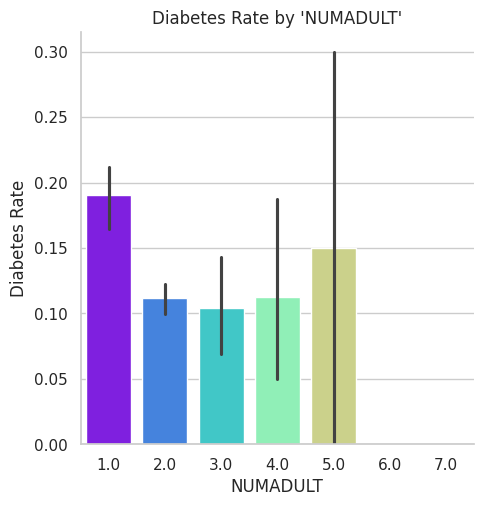

In [ ]:
# NUMADULT
plotter_ind(df, "NUMADULT")

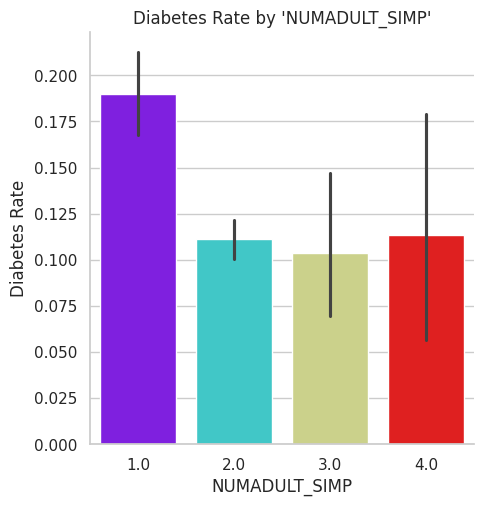

In [ ]:
# NUMADULT_SIMP
plotter_ind(df, "NUMADULT_SIMP")

It turns out that filling our missing values with our median value and simplifying all adults in the household beyond `3` as `4+` actually *increased* the correlation of the variable indicating number of adults in the household with the `'DIABETE_SIMP'` variable.  Between this and the decrease in variability, we think it best to drop the `'NUMADULT'` variable in favor of the `'NUMADULT_SIMP'` variable.  Let's hold on to the both of them for now though since they are relatively close to one another, correlation-wise, and we will revisit the idea to drop right before we start modeling.  

#### Saving a copy of our trimmed down DataFrame

Let's save our work on the dataframe so far.  But before we do that, have we dealt with all the missing data?

In [ ]:
# remaining na
df.isna().sum()

DIABETE_SIMP     0
NUMADULT         0
_RACE            0
FLUSHOT6         0
EMPLOY1          0
SEX              0
MARITAL          0
CVDCRHD4         0
CHCKIDNY         0
USEEQUIP         0
ADDEPEV2         0
RENTHOM1         0
EXERANY2         0
BLIND            0
DECIDE           0
HLTHPLN1         0
_STATE           0
ASTHMA3          0
GENHLTH          0
_AGEG5YR         0
_BMI5CAT         0
CHECKUP1         0
INCOME2          0
_EDUCAG          0
SLEPTIM1         0
MENTHLTH         0
_SMOKER3         0
WEIGHT2_CAT      0
WEIGHT2_CAT2     0
CHILDREN_SIMP    0
DRVISITS_SIMP    0
NUMADULT_SIMP    0
dtype: int64

Perfect.  Save up!

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/trimmed_diabetes_data.csv", index=False)

### New Initialization of the DataFrame

In [6]:
# Read the "trimmed_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/trimmed_diabetes_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4374 entries, 0 to 4373
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DIABETE_SIMP   4374 non-null   float64
 1   NUMADULT       4374 non-null   float64
 2   _RACE          4374 non-null   float64
 3   FLUSHOT6       4374 non-null   float64
 4   EMPLOY1        4374 non-null   float64
 5   SEX            4374 non-null   float64
 6   MARITAL        4374 non-null   float64
 7   CVDCRHD4       4374 non-null   float64
 8   CHCKIDNY       4374 non-null   float64
 9   USEEQUIP       4374 non-null   float64
 10  ADDEPEV2       4374 non-null   float64
 11  RENTHOM1       4374 non-null   float64
 12  EXERANY2       4374 non-null   float64
 13  BLIND          4374 non-null   float64
 14  DECIDE         4374 non-null   float64
 15  HLTHPLN1       4374 non-null   float64
 16  _STATE         4374 non-null   float64
 17  ASTHMA3        4374 non-null   float64
 18  GENHLTH 

Reminder of how our variables are looking.

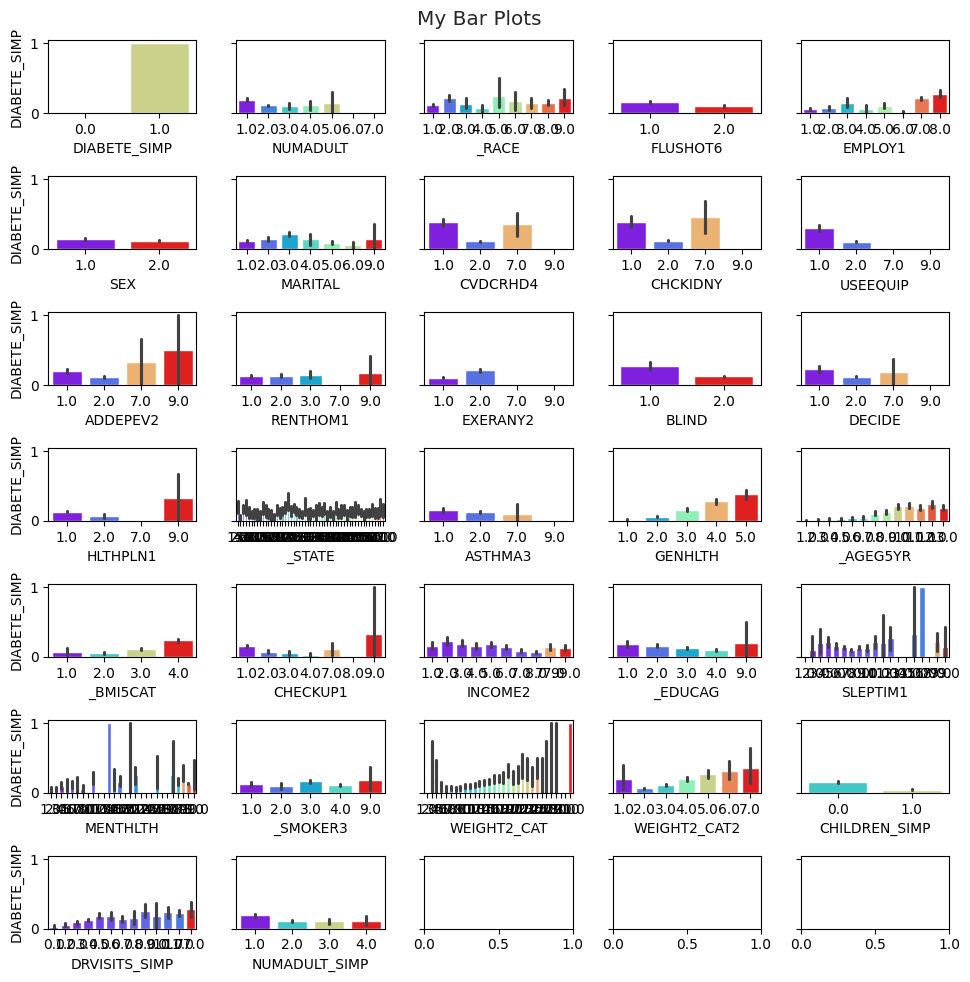

In [7]:
# plotting all of them
plotter_big(df, "DIABETE_SIMP")

We have made great progress with reducing variability and increasing the utility of many of these variables so far.  But there's more yet to be gained!

Note how most of the variables with a 7.0 or 9.0 category have so much variability as to be nearly useless.  In some cases, this hardly matters as the variability in the other categories is nearly as bad, but in other cases, we think our analysis could improve if we dropped or reshaped data with lots of variance.  

#### **Variable:** `'MENTHLTH'`

**Numeric variable**

"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"

**Possible responses:**
- 1 to 30 - "Number of days"
- 77 - "Don't know/Not sure"
- 88 - "None"
- 99 - "Refused"

We are going to convert all `'88.0'` entries into `'0.0'` entries and drop those responses that give us no data.

**New responses:**
- 0 to 30 - "Number of days" (includes "None")


In [8]:
# MENTHLTH counts
give_counts(df, "MENTHLTH")

Counts for 'MENTHLTH' are as follows:
The number of people who answered 1.0 for 'MENTHLTH' is 135.
The number of people who answered 2.0 for 'MENTHLTH' is 195.
The number of people who answered 3.0 for 'MENTHLTH' is 130.
The number of people who answered 4.0 for 'MENTHLTH' is 61.
The number of people who answered 5.0 for 'MENTHLTH' is 152.
The number of people who answered 6.0 for 'MENTHLTH' is 13.
The number of people who answered 7.0 for 'MENTHLTH' is 59.
The number of people who answered 8.0 for 'MENTHLTH' is 13.
The number of people who answered 10.0 for 'MENTHLTH' is 106.
The number of people who answered 11.0 for 'MENTHLTH' is 1.
The number of people who answered 12.0 for 'MENTHLTH' is 10.
The number of people who answered 13.0 for 'MENTHLTH' is 1.
The number of people who answered 14.0 for 'MENTHLTH' is 23.
The number of people who answered 15.0 for 'MENTHLTH' is 94.
The number of people who answered 16.0 for 'MENTHLTH' is 1.
The number of people who answered 18.0 for 'MENTHLTH'

In [9]:
# transform the MENTHLTH variable
li1 = df["MENTHLTH"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 88.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

df.drop("MENTHLTH", axis=1, inplace=True)
df["MENTHLTH"] = li2

In [10]:
# MENTHLTH counts
give_counts(df, "MENTHLTH")

Counts for 'MENTHLTH' are as follows:
The number of people who answered 0.0 for 'MENTHLTH' is 3011.
The number of people who answered 1.0 for 'MENTHLTH' is 135.
The number of people who answered 2.0 for 'MENTHLTH' is 195.
The number of people who answered 3.0 for 'MENTHLTH' is 130.
The number of people who answered 4.0 for 'MENTHLTH' is 61.
The number of people who answered 5.0 for 'MENTHLTH' is 152.
The number of people who answered 6.0 for 'MENTHLTH' is 13.
The number of people who answered 7.0 for 'MENTHLTH' is 59.
The number of people who answered 8.0 for 'MENTHLTH' is 13.
The number of people who answered 10.0 for 'MENTHLTH' is 106.
The number of people who answered 11.0 for 'MENTHLTH' is 1.
The number of people who answered 12.0 for 'MENTHLTH' is 10.
The number of people who answered 13.0 for 'MENTHLTH' is 1.
The number of people who answered 14.0 for 'MENTHLTH' is 23.
The number of people who answered 15.0 for 'MENTHLTH' is 94.
The number of people who answered 16.0 for 'MENTHLT

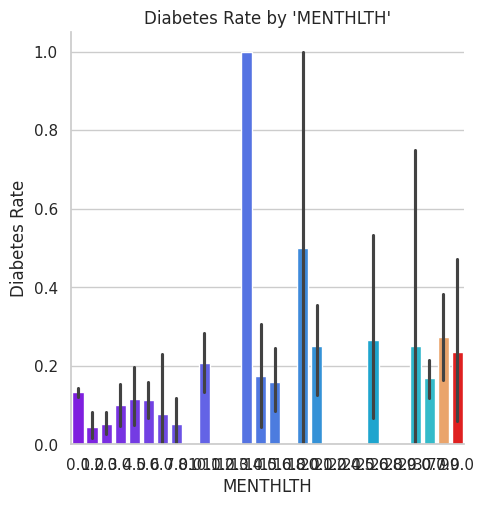

In [11]:
# plot
plotter_ind(df, "MENTHLTH")

There's lots of variability here, and from our earlier counts, there was clear clumping of responses on days divisible by 5. Let's make a quick variable called `'MENTHLTH_SIMP'` that captures `0` days as `0.0`, `1`-`10` days as `1.0`, `11`-`20` days as `2.0`, `21`-`30` days as `3.0`, and leaves unknown (`77.0`) and refuse to answer (`99.0`) as they are (neither entry has enough variability to drop outright).  

In [12]:
# transform the MENTHLTH variable
li1 = df["MENTHLTH"]
li2 = []

for i in range(len(li1)):
  if li1[i] >= 1.0 and li1[i] <= 30.0:
    if li1[i] <= 10.0:
      li2.append(1.0)
    elif li1[i] <= 20.0:
      li2.append(2.0)
    else:
      li2.append(3.0)
  elif li1[i] == 77.0:
    li2.append(7.0)
  elif li1[i] == 99.0:
    li2.append(9.0)
  else:
    li2.append(li1[i])

#df.drop("MENTHLTH", axis=1, inplace=True)
df["MENTHLTH_SIMP"] = li2

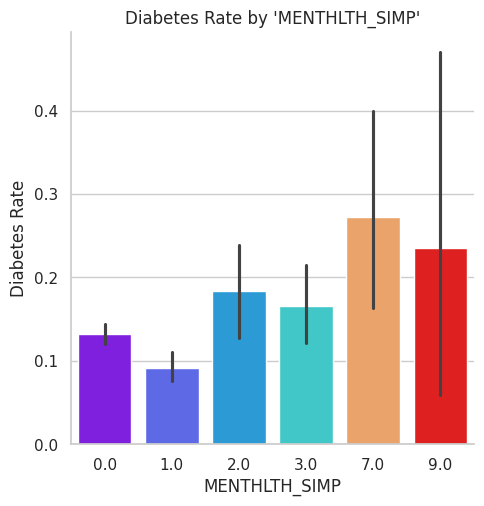

In [13]:
# plot
plotter_ind(df, "MENTHLTH_SIMP")

So we now have two variables measuring mental health, one an incredibly simplified version of the other. We will take a quick look at the correlation between these two variables and our `DIABETE_SIMP` variable to see if the gains from decreasing variability outweigh the simplification of the initial variable.  

In [14]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2          0.002507
RENTHOM1         0.004540
MARITAL          0.007983
_STATE           0.011168
_SMOKER3         0.011401
HLTHPLN1         0.018507
SLEPTIM1         0.019752
SEX              0.029211
ASTHMA3          0.032482
_RACE            0.035134
CHCKIDNY         0.039242
MENTHLTH_SIMP    0.046684
CVDCRHD4         0.050265
DECIDE           0.058574
MENTHLTH         0.064190
ADDEPEV2         0.065638
FLUSHOT6         0.074663
NUMADULT         0.078497
_EDUCAG          0.078812
NUMADULT_SIMP    0.081517
BLIND            0.098197
DRVISITS_SIMP    0.099513
CHECKUP1         0.107401
EXERANY2         0.118370
CHILDREN_SIMP    0.147656
USEEQUIP         0.170657
WEIGHT2_CAT2     0.180852
WEIGHT2_CAT      0.190058
_BMI5CAT         0.212468
EMPLOY1          0.220561
_AGEG5YR         0.222030
GENHLTH          0.301395
DIABETE_SIMP     1.000000
Name: DIABETE_SIMP, dtype: float64

We can see here that there is a decrease in correlation as we move from the initial variable '`MENTHLTH`' to '`MENTHLTH_SIMP`'.  The variability is much improved, but let's leave both variables in the model for the moment and reconsider which to use after the rest of the data has been organized.  

#### **Variable:** `'INCOME2'`

**Categorical variable**

"Is your annual household income (in dollars) from all sources:"

**Possible responses:**
- 1 - "Less than 10,000"
- 2 - "Less than 15,000 (10,000 to less than 15,000)"
- 3 - "Less than 20,000 (15,000 to less than 20,000)"
- 4 - "Less than 25,000 (20,000 to less than 25,000)"
- 5 - "Less than 35,000 (25,000 to less than 35,000)"
- 6 - "Less than 50,000 (35,000 to less than 50,000)"
- 7 - "Less than 75,000 (50,000 to less than 75,000)"
- 8 - "75,000 or more"
- 77 - "Don't know/Not sure"
- 99 - "Refused"


In [15]:
# counts
give_counts(df, "INCOME2")

Counts for 'INCOME2' are as follows:
The number of people who answered 1.0 for 'INCOME2' is 189.
The number of people who answered 2.0 for 'INCOME2' is 230.
The number of people who answered 99.0 for 'INCOME2' is 284.
The number of people who answered 3.0 for 'INCOME2' is 292.
The number of people who answered 4.0 for 'INCOME2' is 351.
The number of people who answered 6.0 for 'INCOME2' is 584.
The number of people who answered 7.0 for 'INCOME2' is 598.
The number of people who answered 8.0 for 'INCOME2' is 1158.
The number of people who answered 5.0 for 'INCOME2' is 424.
The number of people who answered 77.0 for 'INCOME2' is 264.
The number of people who did not answer for 'INCOME2' is 0.
The total number of entries is 4374.


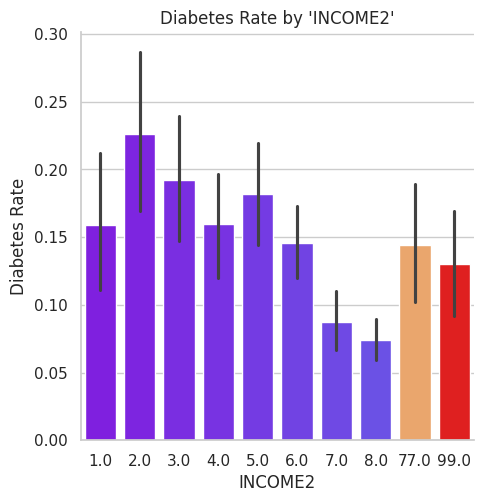

In [16]:
# plot
plotter_ind(df, "INCOME2")

Good, no action needed.  

#### **Variable:** `'MARITAL'`

**Categorical variable**

"Are you:"

**Possible responses:**
* 1 - "Married"
* 2 - "Divorced"
* 3 - "Widowed"
* 4 - "Separated"
* 5 - "Never married"
* 6 - "A member of an unmarried couple"
* 9 - "Refused"

In [17]:
# counts
give_counts(df, "MARITAL")

Counts for 'MARITAL' are as follows:
The number of people who answered 1.0 for 'MARITAL' is 2360.
The number of people who answered 2.0 for 'MARITAL' is 565.
The number of people who answered 3.0 for 'MARITAL' is 603.
The number of people who answered 4.0 for 'MARITAL' is 76.
The number of people who answered 5.0 for 'MARITAL' is 633.
The number of people who answered 6.0 for 'MARITAL' is 123.
The number of people who answered 9.0 for 'MARITAL' is 14.
The number of people who did not answer for 'MARITAL' is 0.
The total number of entries is 4374.


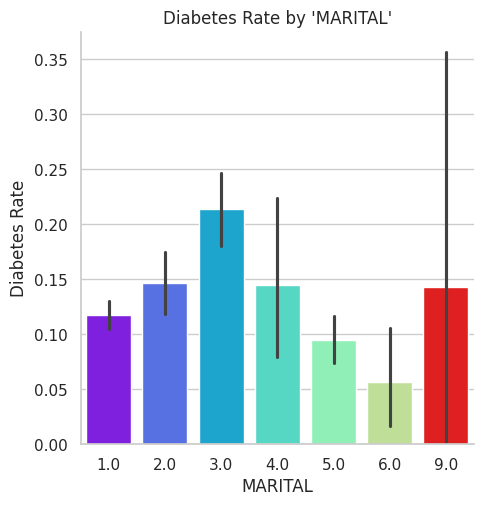

In [18]:
# plot
plotter_ind(df, "MARITAL")

There are too few entries for "Refused" so let's get rid of those values. Just look at that variability on `9.0`!

In [19]:
# dropping
df = row_drop(df, variable="MARITAL", ub=6.0)

Count before dropping any rows from the length of 'MARITAL': 4374
...
...
...

Count after dropping rows from 'MARITAL': 4360


#### **Variable:** `'ADDEPEV2'`

**Categorical variable**

"(Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or minor depression?"

**Possible responses:**
* 1 - "Yes"
* 2 - "No"
* 7 - "Don't know/Not sure"
* 9 - "Refused"

In [20]:
# counts
give_counts(df, "ADDEPEV2")

Counts for 'ADDEPEV2' are as follows:
The number of people who answered 1.0 for 'ADDEPEV2' is 823.
The number of people who answered 2.0 for 'ADDEPEV2' is 3526.
The number of people who answered 9.0 for 'ADDEPEV2' is 2.
The number of people who answered 7.0 for 'ADDEPEV2' is 9.
The number of people who did not answer for 'ADDEPEV2' is 0.
The total number of entries is 4360.


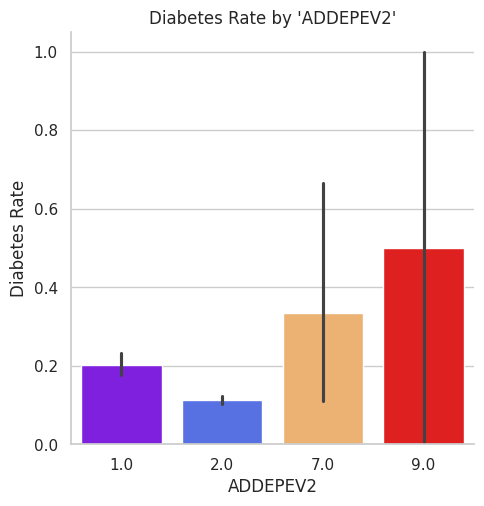

In [21]:
# plot
plotter_ind(df, "ADDEPEV2")

The counts are too low and the variability too massive to keep the "Don't know" and "Refused" answers.  Let's drop those real quick.

In [22]:
# dropping
df = row_drop(df=df, variable="ADDEPEV2", ub=3.0)

Count before dropping any rows from the length of 'ADDEPEV2': 4360
...
...
...

Count after dropping rows from 'ADDEPEV2': 4349


#### **Variable:** `'HLTHPLN1'`

**Categorical variable**

"Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?"

**Possible responses:**
* 1 - "Yes"
* 2 - "No"
* 7 - "Don't know/Not sure"
* 9 - "Refused"

In [23]:
# counts
give_counts(df, "HLTHPLN1")

Counts for 'HLTHPLN1' are as follows:
The number of people who answered 1.0 for 'HLTHPLN1' is 4044.
The number of people who answered 2.0 for 'HLTHPLN1' is 294.
The number of people who answered 9.0 for 'HLTHPLN1' is 5.
The number of people who answered 7.0 for 'HLTHPLN1' is 6.
The number of people who did not answer for 'HLTHPLN1' is 0.
The total number of entries is 4349.


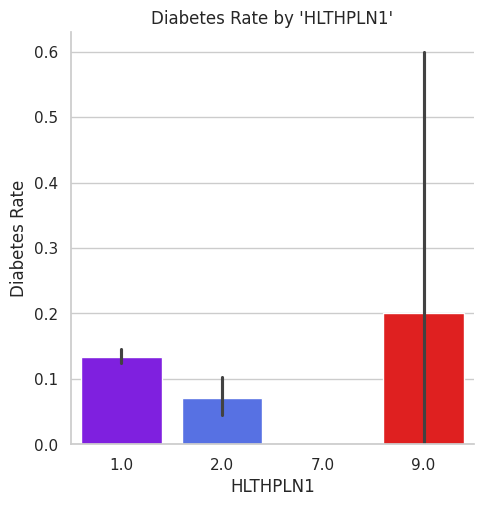

In [24]:
# plot
plotter_ind(df, "HLTHPLN1")

Between the counts and the plot, we are going to drop `7.0` and `9.0` from our evaluation as they will give very little data to our model.  

In [25]:
# dropping
df = row_drop(df=df, variable="HLTHPLN1", ub=3.0)

Count before dropping any rows from the length of 'HLTHPLN1': 4349
...
...
...

Count after dropping rows from 'HLTHPLN1': 4338


#### **Variable:** `'ASTHMA3'`

**Categorical variable**

"(Ever told) you had asthma?"

**Possible responses:**
* 1 - "Yes"
* 2 - "No"
* 7 - "Don't know/Not sure"
* 9 - "Refused"

In [26]:
# counts
give_counts(df, "ASTHMA3")

Counts for 'ASTHMA3' are as follows:
The number of people who answered 1.0 for 'ASTHMA3' is 583.
The number of people who answered 2.0 for 'ASTHMA3' is 3735.
The number of people who answered 9.0 for 'ASTHMA3' is 1.
The number of people who answered 7.0 for 'ASTHMA3' is 19.
The number of people who did not answer for 'ASTHMA3' is 0.
The total number of entries is 4338.


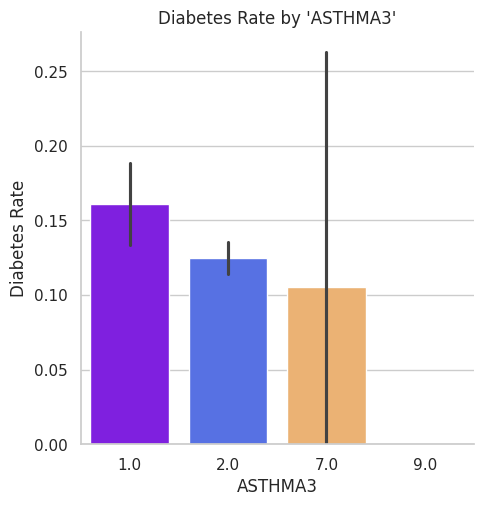

In [27]:
# plot
plotter_ind(df, "ASTHMA3")

The counts are too low and the variability too massive to keep the "Don't know" and "Refused" answers.  Let's drop those real quick.

In [28]:
# dropping
df = row_drop(df=df, variable="ASTHMA3", ub=3.0)

Count before dropping any rows from the length of 'ASTHMA3': 4338
...
...
...

Count after dropping rows from 'ASTHMA3': 4318


#### **Variable:** `'CHECKUP1'`

**Categorical variable**

"About how long has it been since you last visited a doctor for a routine checkup? [A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]"

**Possible responses:**
* 1 - "Within past year (anytime less than 12 months ago)"
* 2 - "Within past 2 years (1 year but less than 2 years ago)"
* 3 - "Within past 5 years (2 years but less than 5 years ago)"
* 4 - "5 or more years ago"
* 7 - "Don't know/Not sure"
* 8 - "Never"
* 9 - "Refused"

In [29]:
# counts
give_counts(df, "CHECKUP1")

Counts for 'CHECKUP1' are as follows:
The number of people who answered 1.0 for 'CHECKUP1' is 3181.
The number of people who answered 2.0 for 'CHECKUP1' is 498.
The number of people who answered 3.0 for 'CHECKUP1' is 293.
The number of people who answered 4.0 for 'CHECKUP1' is 270.
The number of people who answered 7.0 for 'CHECKUP1' is 40.
The number of people who answered 8.0 for 'CHECKUP1' is 33.
The number of people who answered 9.0 for 'CHECKUP1' is 3.
The number of people who did not answer for 'CHECKUP1' is 0.
The total number of entries is 4318.


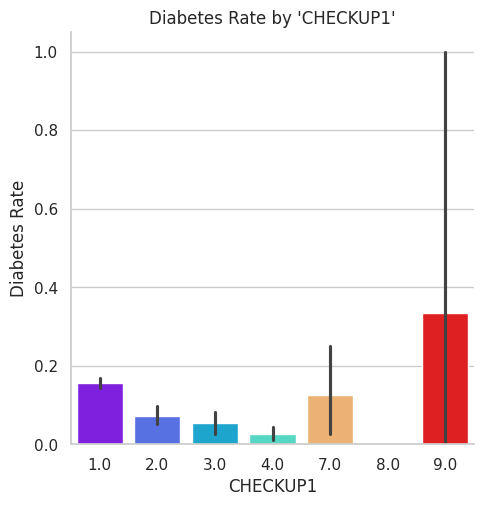

In [30]:
# plot
plotter_ind(df, "CHECKUP1")

We are going to drop the `7.0`, the `8.0`, and the `9.0` responses in this case.  There weren't enough respondents for any of these categories which means they have lots of variability.

In [31]:
# dropping
df = row_drop(df=df, variable="CHECKUP1", ub=4.0)

Count before dropping any rows from the length of 'CHECKUP1': 4318
...
...
...

Count after dropping rows from 'CHECKUP1': 4242


#### **Variable:** `'_EDUCAG'`

**Categorical variable**

"Level of education completed"

**Possible responses:**
* 1 - "Did not graduate High School"
* 2 - "Graduated High School"
* 3 - "Attended College or Technical School"
* 4 - "Graduated from College or Technical School"
* 9 - "Don't know/Not sure/Missing"

In [32]:
# counts
give_counts(df, "_EDUCAG")


Counts for '_EDUCAG' are as follows:
The number of people who answered 1.0 for '_EDUCAG' is 310.
The number of people who answered 2.0 for '_EDUCAG' is 1183.
The number of people who answered 3.0 for '_EDUCAG' is 1129.
The number of people who answered 4.0 for '_EDUCAG' is 1610.
The number of people who answered 9.0 for '_EDUCAG' is 10.
The number of people who did not answer for '_EDUCAG' is 0.
The total number of entries is 4242.


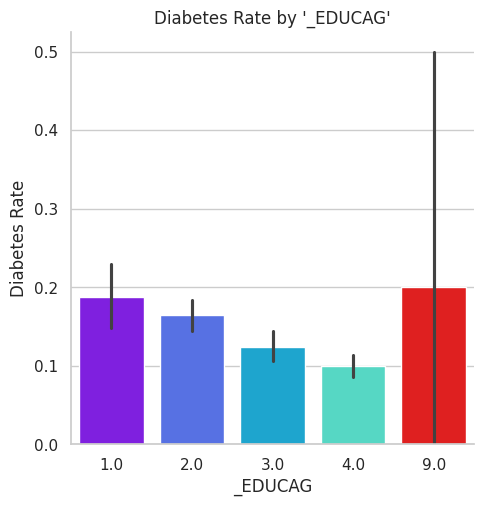

In [33]:
# plot
plotter_ind(df, "_EDUCAG")

We are just going to drop the `9.0` responses in this case.

In [34]:
# dropping
df = row_drop(df=df, variable="_EDUCAG", ub=4.0)

Count before dropping any rows from the length of '_EDUCAG': 4242
...
...
...

Count after dropping rows from '_EDUCAG': 4232


#### **Variable:** `'_SMOKER3'`

**Categorical variable**

"Four-level smoker status:"

**Possible resonses:**
* 1 - "Current smoker - now smokes every day"
* 2 - "Current smoker - now smokes some days"
* 3 - "Former smoker"
* 4 - "Never smoked"
* 9 - "Don't know/Not sure/Missing"

In [35]:
# counts
give_counts(df, "_SMOKER3")

Counts for '_SMOKER3' are as follows:
The number of people who answered 1.0 for '_SMOKER3' is 450.
The number of people who answered 2.0 for '_SMOKER3' is 175.
The number of people who answered 3.0 for '_SMOKER3' is 1249.
The number of people who answered 4.0 for '_SMOKER3' is 2339.
The number of people who answered 9.0 for '_SMOKER3' is 19.
The number of people who did not answer for '_SMOKER3' is 0.
The total number of entries is 4232.


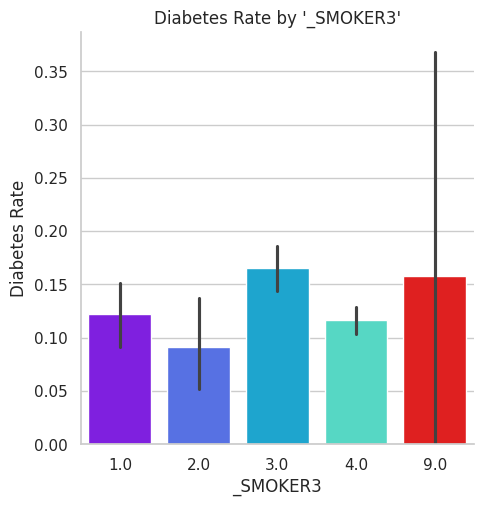

In [36]:
# plot
plotter_ind(df, "_SMOKER3")

Once again we are just dropping the `9.0` responses.

In [37]:
# dropping
df = row_drop(df=df, variable="_SMOKER3", ub=4.0)

Count before dropping any rows from the length of '_SMOKER3': 4232
...
...
...

Count after dropping rows from '_SMOKER3': 4213


#### **Variable:** `'RENTHOM1'`

**Categorical variable**

"Do you own or rent your home? (Home is defined as the place where you live most of the time/the majority of the year.)"

**Possible Responses:**
- 1 - "Own"
- 2 - "Rent"
- 3 - "Other arrangement"
- 7 - "Don't know/Not Sure"
- 9 - "Refused"

In [38]:
# RENTHOM1 counts
give_counts(df, "RENTHOM1")

Counts for 'RENTHOM1' are as follows:
The number of people who answered 1.0 for 'RENTHOM1' is 3186.
The number of people who answered 2.0 for 'RENTHOM1' is 827.
The number of people who answered 3.0 for 'RENTHOM1' is 183.
The number of people who answered 7.0 for 'RENTHOM1' is 6.
The number of people who answered 9.0 for 'RENTHOM1' is 11.
The number of people who did not answer for 'RENTHOM1' is 0.
The total number of entries is 4213.


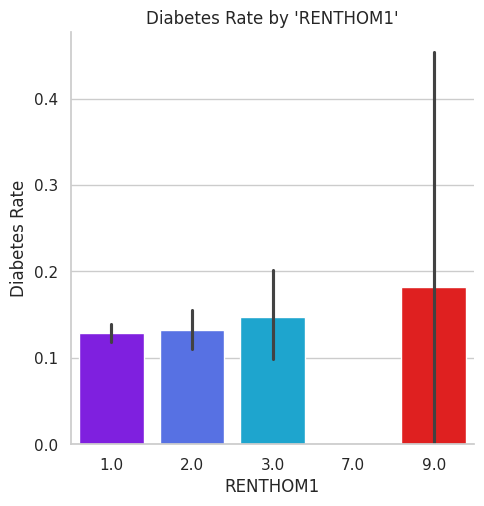

In [39]:
# plot
plotter_ind(df, "RENTHOM1")

**Drop Rationale**

We are going to drop the 7.0 and 9.0 entries of `'RENTHOM1'` as there are too few for our model to learn on.  

In [40]:
# dropping
df = row_drop(df=df, variable="RENTHOM1", ub=3.0)

Count before dropping any rows from the length of 'RENTHOM1': 4213
...
...
...

Count after dropping rows from 'RENTHOM1': 4196


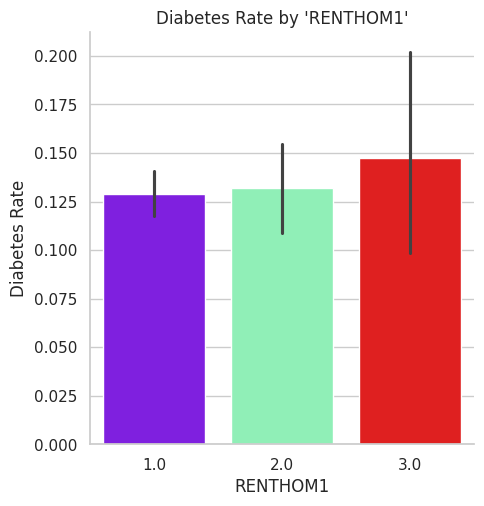

In [41]:
# plot
plotter_ind(df, "RENTHOM1")

Good, no further action needed.

#### **Variable:** `'DECIDE'`

**Categorical variable**

"Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?"

**Possible responses:**
- 1 - "Yes"
- 2 - "No"
- 7 - "Don't know/Not Sure"
- 9 - "Refused"

In [42]:
# DECIDE counts
give_counts(df, "DECIDE")

Counts for 'DECIDE' are as follows:
The number of people who answered 1.0 for 'DECIDE' is 418.
The number of people who answered 2.0 for 'DECIDE' is 3762.
The number of people who answered 9.0 for 'DECIDE' is 2.
The number of people who answered 7.0 for 'DECIDE' is 14.
The number of people who did not answer for 'DECIDE' is 0.
The total number of entries is 4196.


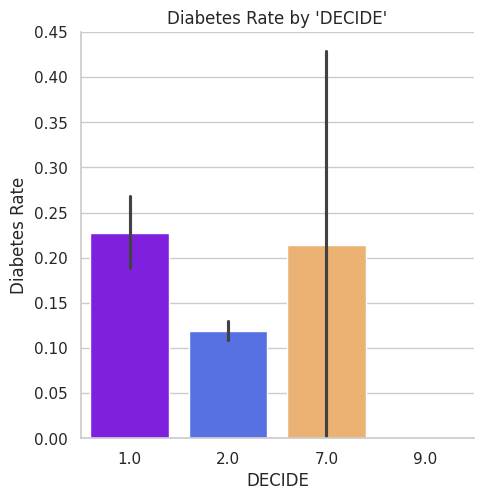

In [43]:
# plot
plotter_ind(df, "DECIDE")

**Drop Rationale**

Entries of 7.0 and 9.0 aren't numerous enough to keep for `'DECIDE'` so we are going to drop the rows containing these values.



In [44]:
# dropping
df = row_drop(df=df, variable="DECIDE", ub=2.0)

Count before dropping any rows from the length of 'DECIDE': 4196
...
...
...

Count after dropping rows from 'DECIDE': 4180


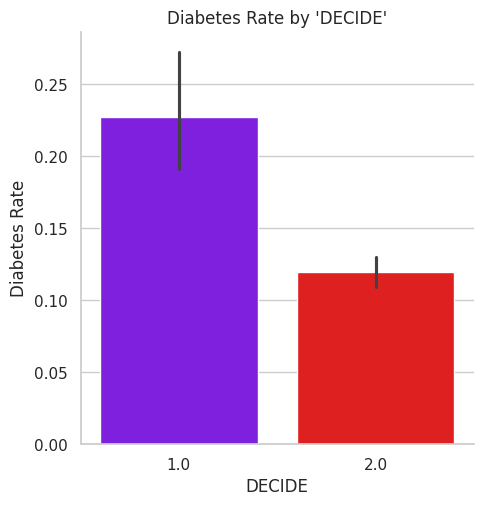

In [45]:
# plot
plotter_ind(df, "DECIDE")

#### **Variable:** `'SLEPTIM1'`

**Numeric variable**

"On average, how many hours of sleep do you get in a 24-hour period?"

**Possible responses:**
* [1-24] - Number of hours
* 77 - Don't know/Not Sure
* 99 - Refused

In [46]:
# counts
give_counts(df, "SLEPTIM1")

Counts for 'SLEPTIM1' are as follows:
The number of people who answered 1.0 for 'SLEPTIM1' is 1.
The number of people who answered 2.0 for 'SLEPTIM1' is 9.
The number of people who answered 3.0 for 'SLEPTIM1' is 20.
The number of people who answered 4.0 for 'SLEPTIM1' is 116.
The number of people who answered 5.0 for 'SLEPTIM1' is 262.
The number of people who answered 6.0 for 'SLEPTIM1' is 900.
The number of people who answered 7.0 for 'SLEPTIM1' is 1279.
The number of people who answered 8.0 for 'SLEPTIM1' is 1222.
The number of people who answered 9.0 for 'SLEPTIM1' is 209.
The number of people who answered 10.0 for 'SLEPTIM1' is 86.
The number of people who answered 11.0 for 'SLEPTIM1' is 5.
The number of people who answered 12.0 for 'SLEPTIM1' is 30.
The number of people who answered 13.0 for 'SLEPTIM1' is 2.
The number of people who answered 14.0 for 'SLEPTIM1' is 1.
The number of people who answered 15.0 for 'SLEPTIM1' is 2.
The number of people who answered 16.0 for 'SLEPTIM1' 

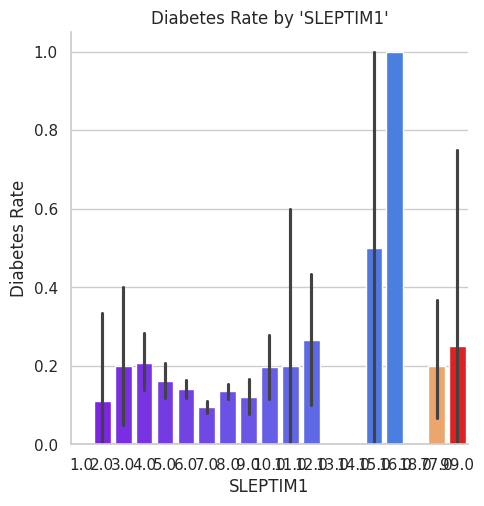

In [47]:
# plot
plotter_ind(df, "SLEPTIM1")

There are enough responses in `77.0` (didn't know) to keep them as is.

**Our actions to undertake:**

1. There are only a few entries for `99.0` (refusal to answer) so we will drop these responses.  

2. For numbers `18.0` and below, there is a lot of variability at the lower and upper ends of the sleep distribution.  Let's make a quick alternate variable we call `'SLEPTIM1_CAT'` that spans:
* `1.0` = (`3.0` or fewer hours of sleep)
* `2.0` = (`4.0` to `5.0` hours of sleep)
* `3.0` = (`6.0` to `7.0` hours of sleep)
* `4.0` = (`8.0` to `9.0` hours of sleep)
* `5.0` = (`10.0` to `11.0` hours of sleep)
* `6.0` = (`12.0` or more hours of sleep)

...to see if the variability decreases without too much information loss with this transformation.



In [48]:
# dropping
df = row_drop(df=df, variable="SLEPTIM1", ub=90.0)

Count before dropping any rows from the length of 'SLEPTIM1': 4180
...
...
...

Count after dropping rows from 'SLEPTIM1': 4176


In [49]:
# transform the SLEPTIM1 variable
li1 = df["SLEPTIM1"]
li2 = []

for i in range(len(li1)):
  if li1[i] <= 3.0:
    li2.append(1.0)
  elif li1[i] == 4.0 or li1[i] == 5.0:
    li2.append(2.0)
  elif li1[i] == 6.0 or li1[i] == 7.0:
    li2.append(3.0)
  elif li1[i] == 8.0 or li1[i] == 9.0:
    li2.append(4.0)
  elif li1[i] == 10.0 or li1[i] == 11.0:
    li2.append(5.0)
  elif li1[i] > 11.0 and li1[i] <= 18.0:
    li2.append(6.0)
  else:
    li2.append(li1[i])

df["SLEPTIM1_CAT"] = li2

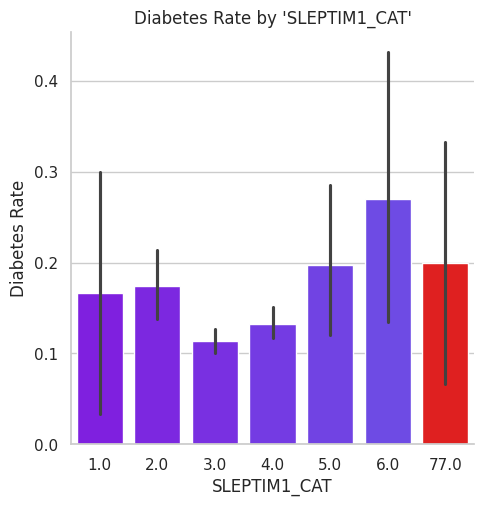

In [50]:
# plot
plotter_ind(df, "SLEPTIM1_CAT")

In [51]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
df.corr()['DIABETE_SIMP'].abs().sort_values()

INCOME2          0.001888
MARITAL          0.007542
RENTHOM1         0.011596
_STATE           0.012677
_SMOKER3         0.014442
SLEPTIM1         0.016720
SLEPTIM1_CAT     0.019103
SEX              0.030153
CHCKIDNY         0.034546
ASTHMA3          0.036498
MENTHLTH_SIMP    0.039045
_RACE            0.039476
CVDCRHD4         0.041902
HLTHPLN1         0.044639
MENTHLTH         0.056627
FLUSHOT6         0.067416
NUMADULT         0.076548
NUMADULT_SIMP    0.079582
_EDUCAG          0.090106
BLIND            0.090747
DECIDE           0.096839
DRVISITS_SIMP    0.106774
ADDEPEV2         0.107472
EXERANY2         0.115166
CHECKUP1         0.127165
CHILDREN_SIMP    0.151785
USEEQUIP         0.167313
WEIGHT2_CAT2     0.179879
WEIGHT2_CAT      0.188123
_BMI5CAT         0.213797
EMPLOY1          0.219605
_AGEG5YR         0.223702
GENHLTH          0.302075
DIABETE_SIMP     1.000000
Name: DIABETE_SIMP, dtype: float64

We can see that there was a very slight increase in correlation between `'DIABETE_SIMP'` and our `'SLEPTIM1_CAT'` variable when we changed it over from `'SLEPTIM1'`.  This combined with the decrease in variability witnessed in our plots serves as sufficient justification to favor the new variable and drop the old.  

In [52]:
# dropping
df.drop("SLEPTIM1", axis=1, inplace=True)

#### **Variable:** `'EXERANY2'`

**Categorical variable**

"During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?"

**Possible responses:**
* 1 - "Yes"
* 2 - "No"
* 7 - "Don't know/Not Sure"
* 9 - "Refused"

In [54]:
# counts
give_counts(df, "EXERANY2")

Counts for 'EXERANY2' are as follows:
The number of people who answered 1.0 for 'EXERANY2' is 3194.
The number of people who answered 2.0 for 'EXERANY2' is 978.
The number of people who did not answer for 'EXERANY2' is 0.
The total number of entries is 4172.


We're not even going to both with a plot of this.  We are dropping both the 'Don't know' and the 'Refused' answers as there are too few to consider training a model on.  

In [53]:
# dropping
df= row_drop(df=df, variable="EXERANY2", ub=2.0)

Count before dropping any rows from the length of 'EXERANY2': 4176
...
...
...

Count after dropping rows from 'EXERANY2': 4172


#### **Variable:** `'USEEQUIP'`

**Categorical variable**

"Do you now have any health problem that requires you to use special equipment, such as a cane, a wheelchair, a special bed, or a special telephone? (Include occasional use or use in certain circumstances.)"

**Possible responses:**
* 1 - "Yes"
* 2 - "No"
* 7 - "Don't know/Not Sure"
* 9 - "Refused"

In [55]:
# counts
give_counts(df, "USEEQUIP")

Counts for 'USEEQUIP' are as follows:
The number of people who answered 1.0 for 'USEEQUIP' is 491.
The number of people who answered 2.0 for 'USEEQUIP' is 3677.
The number of people who answered 9.0 for 'USEEQUIP' is 2.
The number of people who answered 7.0 for 'USEEQUIP' is 2.
The number of people who did not answer for 'USEEQUIP' is 0.
The total number of entries is 4172.


Once again, we can safely discard 'Don't know' and 'Refused' rows as there are too few to be useful to our model.  

In [56]:
# dropping
df = row_drop(df=df, variable="USEEQUIP", ub=2.0)

Count before dropping any rows from the length of 'USEEQUIP': 4172
...
...
...

Count after dropping rows from 'USEEQUIP': 4168


#### **Variable:** `'CVDCRHD4'`

**Categorical variable**

"(Ever told) you had angina or coronary heart disease?"

**Possible responses:**
* 1 - "Yes"
* 2 - "No"
* 7 - "Don't know/Not Sure"
* 9 - "Refused"

In [57]:
# counts
give_counts(df, "CVDCRHD4")

Counts for 'CVDCRHD4' are as follows:
The number of people who answered 1.0 for 'CVDCRHD4' is 265.
The number of people who answered 2.0 for 'CVDCRHD4' is 3872.
The number of people who answered 9.0 for 'CVDCRHD4' is 3.
The number of people who answered 7.0 for 'CVDCRHD4' is 28.
The number of people who did not answer for 'CVDCRHD4' is 0.
The total number of entries is 4168.


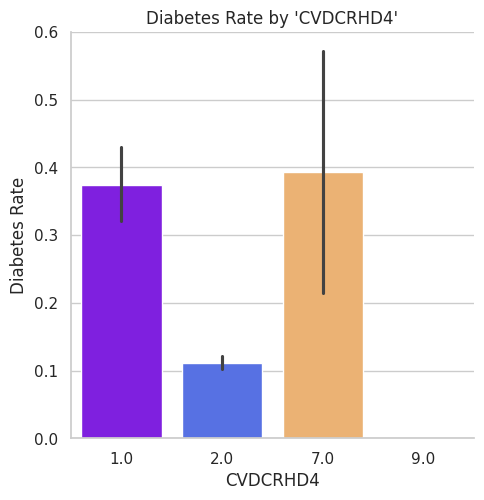

In [58]:
# plot
plotter_ind(df, "CVDCRHD4")

We are obviously going to drop the 'Refused' responses, but it isn't quite as clear cut with 'Don't know'.  In this case, the variability is huge for the 'Don't know' responses and given that this variability also straddles 0.5, we think it more useful to prune than keep.  

In [60]:
# dropping
df = row_drop(df=df, variable="CVDCRHD4", ub=2.0)

Count before dropping any rows from the length of 'CVDCRHD4': 4168
...
...
...

Count after dropping rows from 'CVDCRHD4': 4137


#### **Variable:** `'CHCKIDNY'`

**Categorical variable**

"(Ever told) you have kidney disease? Do NOT include kidney stones, bladder infection or incontinence."

**Possible responses:**
* 1 - "Yes"
* 2 - "No"
* 7 - "Don't know/Not Sure"
* 9 - "Refused"

In [61]:
# counts
give_counts(df, "CHCKIDNY")

Counts for 'CHCKIDNY' are as follows:
The number of people who answered 1.0 for 'CHCKIDNY' is 140.
The number of people who answered 2.0 for 'CHCKIDNY' is 3983.
The number of people who answered 9.0 for 'CHCKIDNY' is 2.
The number of people who answered 7.0 for 'CHCKIDNY' is 12.
The number of people who did not answer for 'CHCKIDNY' is 0.
The total number of entries is 4137.


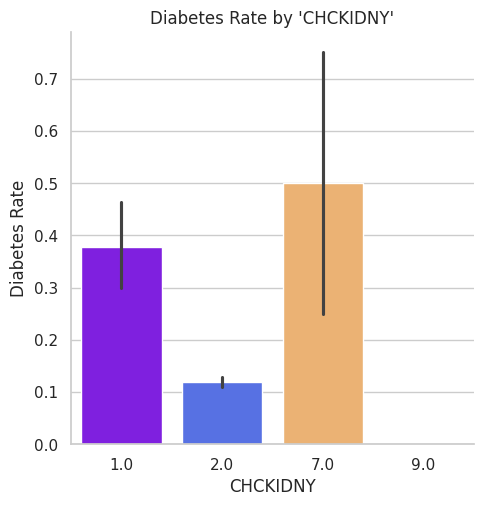

In [62]:
# plot
plotter_ind(df, "CHCKIDNY")

We are going to drop 'Don't know' and 'Refused' responses as they are minimally useful with such low counts and high variability.  

In [63]:
# dropping
df = row_drop(df=df, variable="CHCKIDNY", ub=2.0)

Count before dropping any rows from the length of 'CHCKIDNY': 4137
...
...
...

Count after dropping rows from 'CHCKIDNY': 4123


#### Reflecting and Saving our Progress

Okay, let's take a look at our big spread of all our plots!

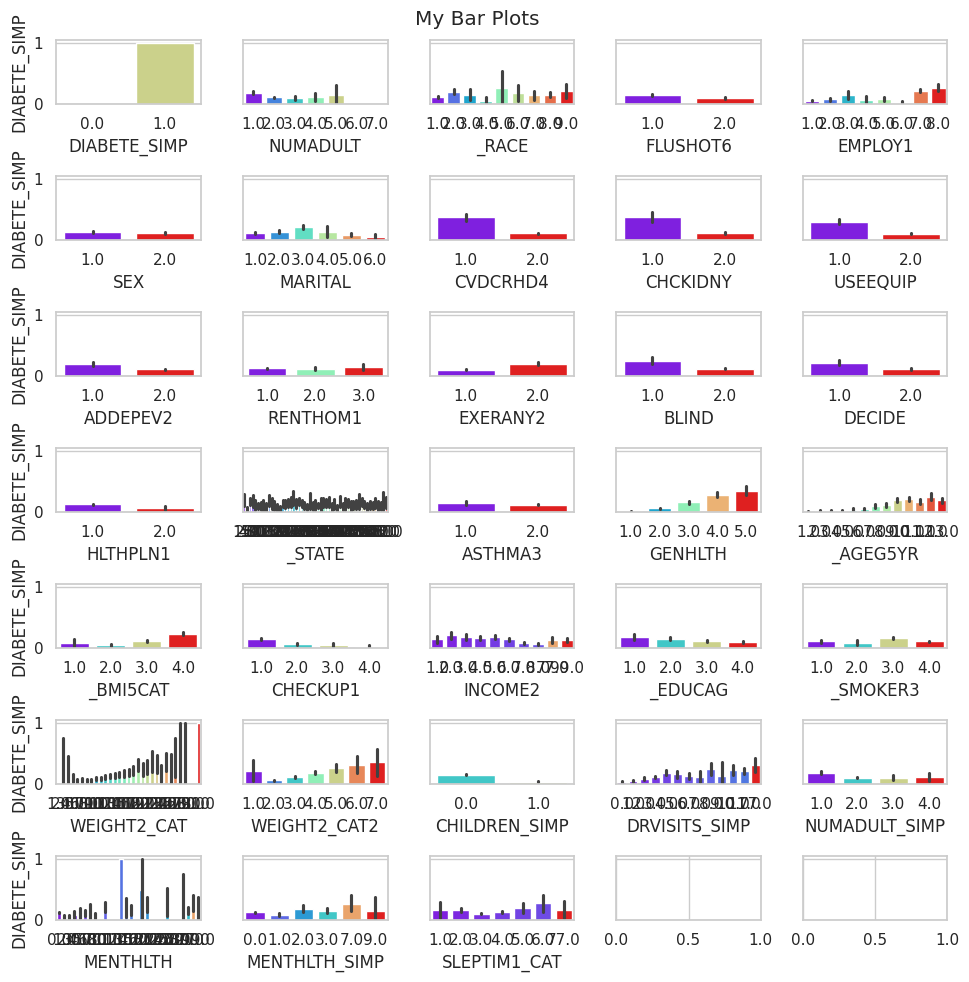

In [64]:
# plotting all of them
plotter_big(df, "DIABETE_SIMP")

In [65]:
# Save the modified DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/mod_trimmed_diabetes_data.csv", index=False)

## Modeling (START HERE NEXT TIME)


According to the instructions, we want to "build a model to identify risk factors for diabetes".  This isn't a very specific directive (which seems purposeful).  We have been trying to decide what kind of analysis to run this whole time, but that is very difficult to do without first deciding how to interpret the assignment.

Let's take a quick look at `'DIABETE3'` again below.  

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "trimmed_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/mod_trimmed_diabetes_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  4659 non-null   int64  
 1   DIABETE3  4659 non-null   float64
 2   NUMADULT  3034 non-null   float64
 3   DRVISITS  3321 non-null   float64
 4   _RACE     4659 non-null   float64
 5   MSCODE    2981 non-null   float64
 6   FLUSHOT6  4659 non-null   float64
 7   EMPLOY1   4659 non-null   float64
 8   SEX       4659 non-null   float64
 9   MARITAL   4659 non-null   float64
 10  CVDCRHD4  4659 non-null   float64
 11  HLTHCVR1  3100 non-null   float64
 12  CHCKIDNY  4659 non-null   float64
 13  USEEQUIP  4659 non-null   float64
 14  ADDEPEV2  4659 non-null   float64
 15  RENTHOM1  4659 non-null   float64
 16  EXERANY2  4659 non-null   float64
 17  BLIND     4659 non-null   float64
 18  DECIDE    4659 non-null   float64
 19  HLTHPLN1  4659 non-null   float64
 20  _STATE    4659 non-null   floa

In [ ]:
# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

The number of people who answered 1.0 for 'DIABETE3' is 582.
The number of people who answered 2.0 for 'DIABETE3' is 36.
The number of people who answered 3.0 for 'DIABETE3' is 3969.
The number of people who answered 4.0 for 'DIABETE3' is 72.


Part of the difficulty in deciding on our interpretation lies in how the `'DIABETE3'` variable is structured.  It is categorical without truly being ordinal.  There is a 'no' response, a 'yes' response, an 'in between' response (pre-diabetic), and an 'occasionally' response (while female during pregnancy).  Does 'identifying risk factors' mean that we should include the 36 entries for 'females while pregnant?  Would that even be a big enough sample for our model?  Frankly, 72 observations of pre-diabetic folks is barely a large enough sample as it is, so dropping the pregnancy responses is tentatively the right call.  

We see two potential routes to explore.  In our first potential route, we could ditch both of our less definite responses and run a Logistic Regression (or another classification model).  In our second potential route, we could just ditch the pregnancy responses, treat pre-diabetics as a midpoint between diabetics and non-diabetics, and then run an Ordinal Logistic Regression on our now ordinal data.  

We're going to go with a basic Logistic Regression.

In [ ]:
# swap '3.0' to '0.0
li1 = df["DIABETE3"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 3.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

df.drop("DIABETE3", axis=1, inplace=True)
df["DIABETE3"] = li2

# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

# before dropping
print("\nBefore dropping:", len(df))

# drop rows with values of '2.0' and '4.0' in DIABETE3
df = df[~(df.DIABETE3 == 2.0)]
df = df[~(df.DIABETE3 == 4.0)]


# After dropping
print("After dropping:", len(df))

# sum missing data
df.isna().sum()
print("")

# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

The number of people who answered 0.0 for 'DIABETE3' is 3969.
The number of people who answered 1.0 for 'DIABETE3' is 582.
The number of people who answered 2.0 for 'DIABETE3' is 36.
The number of people who answered 4.0 for 'DIABETE3' is 72.

Before dropping: 4659
After dropping: 4551


The number of people who answered 0.0 for 'DIABETE3' is 3969.
The number of people who answered 1.0 for 'DIABETE3' is 582.


### **Logistic Regression**

We are going to do a Logistic Regression and drop the pre-diabetic responses.  Hopefully, the insights garnered from comparing diabetics to non-diabetics will be applicable to the pre-diabetic and diabetic while pregnant folks as well.  

#### **Last Tweaks**

Before we can start our Logistic Regression, we have a few more things to tidy in our data.  We are going to stick with our earlier plan of dropping the rest of the columns with missing data from our data set.  The columns are `'NUMADULT'`, `'DRVISITS'`, `'MSCODE'`, and `'HLTHCVR1'`.  

In [ ]:
# dropping
df.drop("NUMADULT", axis=1, inplace=True)
df.drop("DRVISITS", axis=1, inplace=True)
df.drop("MSCODE", axis=1, inplace=True)
df.drop("HLTHCVR1", axis=1, inplace=True)

We will also drop the non-numeric data from the only strictly numeric variable we are still using, `'CHILDREN'`.

In [ ]:
# CHILDREN count
for i in set(df["CHILDREN"]):
    num = len(df[df["CHILDREN"] == i])
    print(f"The number of people who answered {i} for 'CHILDREN' is {num}.")

# before dropping
print("Before dropping:", len(df))

# drop rows with values of 99.0 in CHILDREN column
df = df[~(df.CHILDREN == 99.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

The number of people who answered 0.0 for 'CHILDREN' is 3354.
The number of people who answered 1.0 for 'CHILDREN' is 483.
The number of people who answered 2.0 for 'CHILDREN' is 430.
The number of people who answered 3.0 for 'CHILDREN' is 173.
The number of people who answered 4.0 for 'CHILDREN' is 57.
The number of people who answered 99.0 for 'CHILDREN' is 17.
The number of people who answered 5.0 for 'CHILDREN' is 19.
The number of people who answered 6.0 for 'CHILDREN' is 14.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 1.
Before dropping: 4551
After dropping: 4534



PERSONID    0
_RACE       0
FLUSHOT6    0
EMPLOY1     0
SEX         0
MARITAL     0
CVDCRHD4    0
CHCKIDNY    0
USEEQUIP    0
ADDEPEV2    0
RENTHOM1    0
EXERANY2    0
BLIND       0
DECIDE      0
HLTHPLN1    0
_STATE      0
ASTHMA3     0
GENHLTH     0
_AGEG5YR    0
_BMI5CAT    0
CHECKUP1    0
INCOME2     0
_EDUCAG     0
SLEPTIM1    0
_SMOKER3    0
CHILDREN    0
WEIGHT2     0
MENTHLTH    0
DIABETE3    0
dtype: int64

Let's look at one last scatterplot.

In [ ]:
df.columns

Index(['PERSONID', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL',
       'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH', 'DIABETE3'],
      dtype='object')

In [ ]:
neworder = ['PERSONID', 'DIABETE3', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL',
       'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH']

df=df.reindex(columns=neworder)
df.columns

Index(['PERSONID', 'DIABETE3', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX',
       'MARITAL', 'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1',
       'EXERANY2', 'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3',
       'GENHLTH', '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG',
       'SLEPTIM1', '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH'],
      dtype='object')

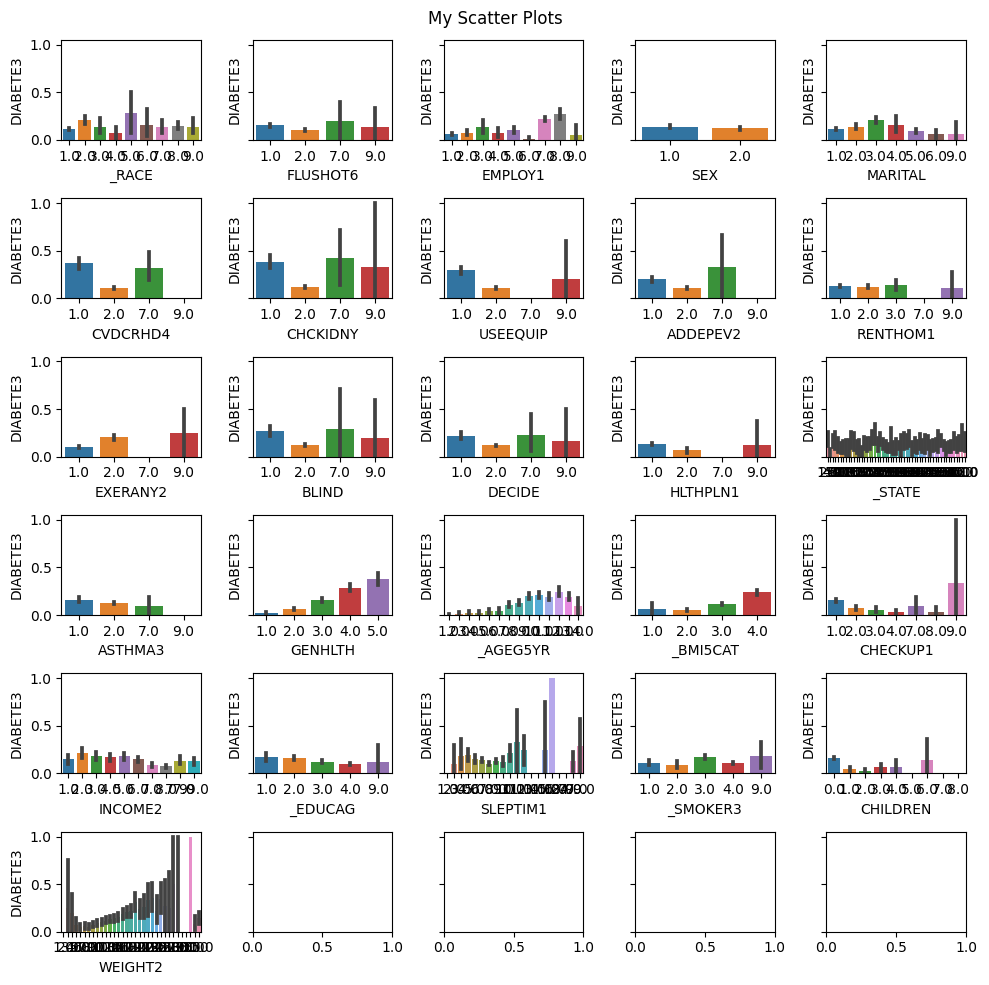

In [ ]:
# plot build
fig, ax = plt.subplots(6, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(df.columns[2:-1]):
  if i <= 4:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[4,i-20])
  else:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[5,i-25])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/LRM_model_data.csv", index=False)

#### **Let's set up the Logistic Regression!**

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "complete_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/LRM_model_data.csv")

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

df.drop("PERSONID", axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('DIABETE3', axis=1), df['DIABETE3'], test_size=0.2, random_state=42)

# Define the parameter grid for the logistic regression model
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_acc = grid_search.best_score_

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", best_params)
print("Best accuracy score:", best_acc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, grid_search.predict(X_test))
print(cm)

Best parameters: {'C': 10, 'penalty': 'l2'}
Best accuracy score: 0.8781366011209271
[[763  22]
 [104  18]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Fit model with best parameters

In [ ]:
best_model = LogisticRegression(C= 10, penalty='l2')
best_model.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print('Recall:', recall)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8610804851157663
Recall: 0.8610804851157663
Confusion Matrix:
[[763  22]
 [104  18]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Which features play most strongly into diabetes?

In [ ]:
# features
features_dict = dict(zip(X_train.columns, list(best_model.coef_[0])))
features_dict

{'_RACE': 0.05375907516669117,
 'FLUSHOT6': -0.0043670817281044345,
 'EMPLOY1': 0.03775587698946592,
 'SEX': -0.349754399723058,
 'MARITAL': 0.00030000514187183795,
 'CVDCRHD4': -0.4226490403745349,
 'CHCKIDNY': -0.26809135448823707,
 'USEEQUIP': -0.2271835890177115,
 'ADDEPEV2': -0.5198894756509375,
 'RENTHOM1': -0.09375950522461604,
 'EXERANY2': -0.06129270324346257,
 'BLIND': -0.4356339478950831,
 'DECIDE': -0.08033765458478032,
 'HLTHPLN1': -0.4488780658054785,
 '_STATE': -0.005348134120522003,
 'ASTHMA3': -0.3506977718396372,
 'GENHLTH': 0.6074175430548513,
 '_AGEG5YR': 0.13727398483746892,
 '_BMI5CAT': 0.560044976538366,
 'CHECKUP1': -0.2542802286445705,
 'INCOME2': -0.0004850641538459797,
 '_EDUCAG': -0.08346097106143006,
 'SLEPTIM1': 0.0004692144802356516,
 '_SMOKER3': -0.022285770554152654,
 'CHILDREN': -0.20635929380351017,
 'WEIGHT2': 0.011007889209201129,
 'MENTHLTH': -0.026782651395926158}

In [ ]:
# sort and display in decending order of importance
sorted_dict = sorted(features_dict.items(), key=lambda x: abs(x[1]))

sorted_dict.reverse()
sorted_dict

[('GENHLTH', 0.6074175430548513),
 ('_BMI5CAT', 0.560044976538366),
 ('ADDEPEV2', -0.5198894756509375),
 ('HLTHPLN1', -0.4488780658054785),
 ('BLIND', -0.4356339478950831),
 ('CVDCRHD4', -0.4226490403745349),
 ('ASTHMA3', -0.3506977718396372),
 ('SEX', -0.349754399723058),
 ('CHCKIDNY', -0.26809135448823707),
 ('CHECKUP1', -0.2542802286445705),
 ('USEEQUIP', -0.2271835890177115),
 ('CHILDREN', -0.20635929380351017),
 ('_AGEG5YR', 0.13727398483746892),
 ('RENTHOM1', -0.09375950522461604),
 ('_EDUCAG', -0.08346097106143006),
 ('DECIDE', -0.08033765458478032),
 ('EXERANY2', -0.06129270324346257),
 ('_RACE', 0.05375907516669117),
 ('EMPLOY1', 0.03775587698946592),
 ('MENTHLTH', -0.026782651395926158),
 ('_SMOKER3', -0.022285770554152654),
 ('WEIGHT2', 0.011007889209201129),
 ('_STATE', -0.005348134120522003),
 ('FLUSHOT6', -0.0043670817281044345),
 ('INCOME2', -0.0004850641538459797),
 ('SLEPTIM1', 0.0004692144802356516),
 ('MARITAL', 0.00030000514187183795)]

In [ ]:
# print the top 10 most consequential features of our dataset
print("According to our analysis:")
print("")
for i in range(10):
  print(f"The {sorted_dict[i][0]} variable was the number {i+1} most important feature with a coefficient value of {sorted_dict[i][1]}.")

According to our analysis:

The GENHLTH variable was the number 1 most important feature with a coefficient value of 0.6074175430548513.
The _BMI5CAT variable was the number 2 most important feature with a coefficient value of 0.560044976538366.
The ADDEPEV2 variable was the number 3 most important feature with a coefficient value of -0.5198894756509375.
The HLTHPLN1 variable was the number 4 most important feature with a coefficient value of -0.4488780658054785.
The BLIND variable was the number 5 most important feature with a coefficient value of -0.4356339478950831.
The CVDCRHD4 variable was the number 6 most important feature with a coefficient value of -0.4226490403745349.
The ASTHMA3 variable was the number 7 most important feature with a coefficient value of -0.3506977718396372.
The SEX variable was the number 8 most important feature with a coefficient value of -0.349754399723058.
The CHCKIDNY variable was the number 9 most important feature with a coefficient value of -0.26809

At last!  We have figured our which of our features are the most important to determining whether or not a person is diabetic.  Thankfully, the somewhat obvious variables were confirmed to be the most impactful.  Normally, we would save the model, but as this book is for demonstration purposes we will stop here.  

Thank you for following along!